## Predictive Modeling in Healthcare: Multi-Class Classification of Medical Test Results using ML and DL Techniques¶

In [10]:
from IPython.display import Image, display

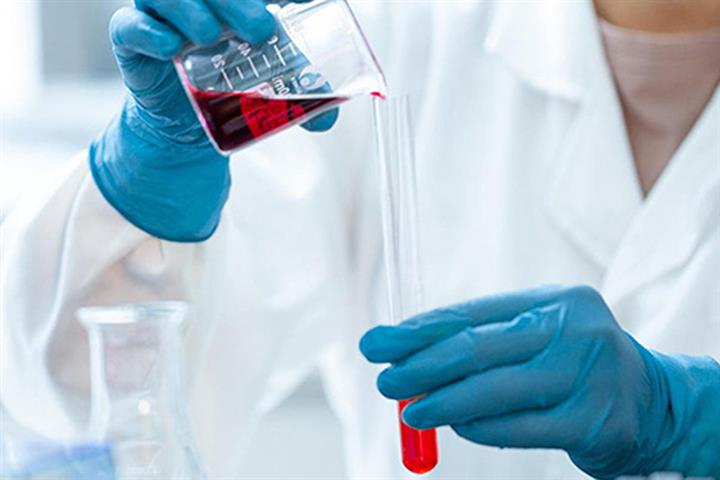

In [11]:
display(Image(filename='healthcare_image.png'))

The **Healthcare Dataset** is a synthetic dataset generated to mimic real-world healthcare data. It is designed to help data science, machine learning, and data analysis enthusiasts develop and test their skills in healthcare analytics while avoiding privacy concerns associated with real patient data. The dataset can be used for various tasks, such as classification, prediction, and data visualization, and focuses on solving a **Multi-Class Classification Problem** where the target is the **Test Results** column.

### Dataset Structure:

Here is a breakdown of the dataset's columns and their descriptions:

1. **Name**: This column contains the name of the patient associated with each healthcare record.
2. **Age**: Represents the age of the patient at the time of admission, in years.
3. **Gender**: Indicates the patient's gender, either "Male" or "Female."
4. **Blood Type**: The patient’s blood type, which could be one of the common types such as "A+", "O-", etc.
5. **Medical Condition**: Specifies the primary diagnosis or medical condition of the patient (e.g., "Diabetes," "Hypertension," "Asthma").
6. **Date of Admission**: The date on which the patient was admitted to the hospital or healthcare facility.
7. **Doctor**: The name of the doctor responsible for the patient’s care.
8. **Hospital**: Identifies the healthcare facility where the patient was admitted.
9. **Insurance Provider**: This column indicates the insurance provider (e.g., "Aetna," "Blue Cross," "Cigna").
10. **Billing Amount**: The cost of healthcare services billed to the patient, expressed as a floating-point number.
11. **Room Number**: The number of the room where the patient was accommodated during their stay.
12. **Admission Type**: Indicates the type of hospital admission (e.g., "Emergency," "Elective," or "Urgent").
13. **Discharge Date**: The date the patient was discharged from the facility, calculated based on the admission date.
14. **Medication**: Medication prescribed during the patient’s stay (e.g., "Aspirin," "Ibuprofen," "Penicillin").
15. **Test Results**: The results of a medical test performed during the patient’s stay. It is the **target column** for classification and has three possible outcomes: "Normal," "Abnormal," or "Inconclusive."

### Usage Scenarios:

The dataset can be applied in various scenarios, such as:

- **Healthcare Predictive Models**: Develop predictive models that can forecast the patient's medical test results (Normal, Abnormal, Inconclusive) based on patient characteristics.
- **Data Cleaning and Transformation**: Practice data preprocessing techniques like handling missing data, transforming categorical variables, and normalizing numerical features.
- **Data Visualization**: Gain insights by visualizing trends, such as how test results vary with age, medical conditions, or hospital admission types.
- **Healthcare Analytics Education**: Use this data for teaching and learning concepts related to healthcare data analysis, machine learning models, or general data science techniques.

### Multi-Class Classification Problem:

The primary objective is to classify the **Test Results** into one of the three categories:

1. **Normal**
2. **Abnormal**
3. **Inconclusive**

By using the features such as Age, Medical Condition, Admission Type, Medication, etc., you can train a multi-class classification model (like Random Forest, Decision Trees, Neural Networks) to predict the outcomes.

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")


In [13]:
df= pd.read_csv("healthcare_dataset_new.csv")
df.head()

Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        31-01-2024   
1   LesLie TErRy   62    Male         A+           Obesity        20-08-2019   
2    DaNnY sMitH   76  Female         A-           Obesity        22-09-2022   
3   andrEw waTtS   28  Female         O+          Diabetes        18-11-2020   
4  adrIENNE bEll   43  Female        AB+            Cancer        19-09-2022   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0     18856.28131          328         Urgent     02-02-2024  Paracetamol   
1     33643.32729          265      Emergency     26-08-2019    Ibuprofen   
2     27955.09608          205      Emergency     07-10-2022      Aspirin   
3     37909.78241          450       Elective     18-12-2020    Ibuprofen   
4     14238.31781          458         Urgent     09-10-2022   Penicillin   

   Test Results  
0        Normal  
1  Inconclusive  
2        Normal  
3      Abnormal  
4      Abnormal

In [14]:
df.shape

(55500, 15)

In [15]:
df.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

In [16]:
df.duplicated().sum()

534

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [20]:
df.isnull().sum().sum()

0

In [21]:
df.describe()

Age  Billing Amount   Room Number
count  54966.000000    54966.000000  54966.000000
mean      51.535185    25544.306284    301.124404
std       19.605661    14208.409711    115.223143
min       13.000000    -2008.492140    101.000000
25%       35.000000    13243.718638    202.000000
50%       52.000000    25542.749145    302.000000
75%       68.000000    37819.858157    401.000000
max       89.000000    52764.276740    500.000000

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54966 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                54966 non-null  object 
 1   Age                 54966 non-null  int64  
 2   Gender              54966 non-null  object 
 3   Blood Type          54966 non-null  object 
 4   Medical Condition   54966 non-null  object 
 5   Date of Admission   54966 non-null  object 
 6   Doctor              54966 non-null  object 
 7   Hospital            54966 non-null  object 
 8   Insurance Provider  54966 non-null  object 
 9   Billing Amount      54966 non-null  float64
 10  Room Number         54966 non-null  int64  
 11  Admission Type      54966 non-null  object 
 12  Discharge Date      54966 non-null  object 
 13  Medication          54966 non-null  object 
 14  Test Results        54966 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.7+ MB


In [23]:
df.nunique()

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
dtype: int64

In [24]:
# Lets separateout object, int, flot columns for easy data transofrmation
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns :")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64','float64']).columns
print("\nNumerical columns :")
print(numerical_columns)

Object columns :
Index(['Name', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Admission Type', 'Discharge Date', 'Medication', 'Test Results'],
      dtype='object')

Numerical columns :
Index(['Age', 'Billing Amount', 'Room Number'], dtype='object')


In [25]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []


    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64','float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)
    return categorical_features, non_categorical_features, discrete_features, continuous_features               
                

In [26]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [27]:
print("Categorical Features :", categorical)
print("***************")
print("Non-Categorical Features :", non_categorical)
print("***************")
print("Discrete Features :", discrete)
print("***************")
print("Continuous Features :", continuous)
print("***************")

Categorical Features : ['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider', 'Admission Type', 'Medication', 'Test Results']
***************
Non-Categorical Features : ['Name', 'Date of Admission', 'Doctor', 'Hospital', 'Discharge Date']
***************
Discrete Features : []
***************
Continuous Features : ['Age', 'Billing Amount', 'Room Number']
***************


In [28]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Gender
['Male' 'Female']

Blood Type
['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']

Medical Condition
['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']

Insurance Provider
['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']

Admission Type
['Urgent' 'Emergency' 'Elective']

Medication
['Paracetamol' 'Ibuprofen' 'Aspirin' 'Penicillin' 'Lipitor']

Test Results
['Normal' 'Inconclusive' 'Abnormal']



In [29]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Gender
Gender
Male      27496
Female    27470
Name: count, dtype: int64

Blood Type
Blood Type
A-     6898
A+     6896
B+     6885
AB+    6882
AB-    6874
B-     6872
O+     6855
O-     6804
Name: count, dtype: int64

Medical Condition
Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64

Insurance Provider
Insurance Provider
Cigna               11139
Medicare            11039
UnitedHealthcare    11014
Blue Cross          10952
Aetna               10822
Name: count, dtype: int64

Admission Type
Admission Type
Elective     18473
Urgent       18391
Emergency    18102
Name: count, dtype: int64

Medication
Medication
Lipitor        11038
Ibuprofen      11023
Aspirin        10984
Paracetamol    10965
Penicillin     10956
Name: count, dtype: int64

Test Results
Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64



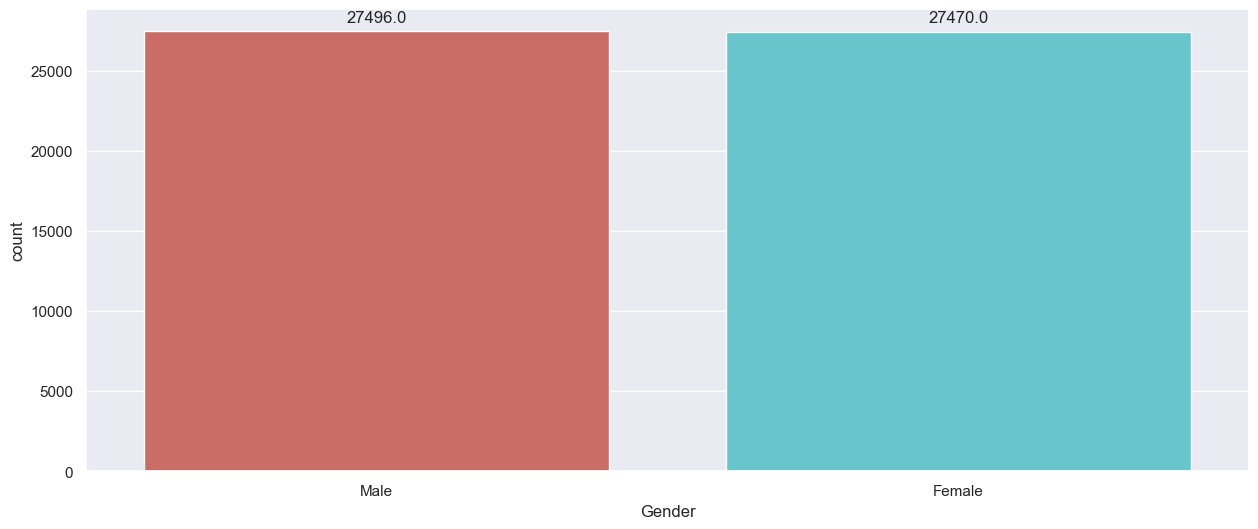

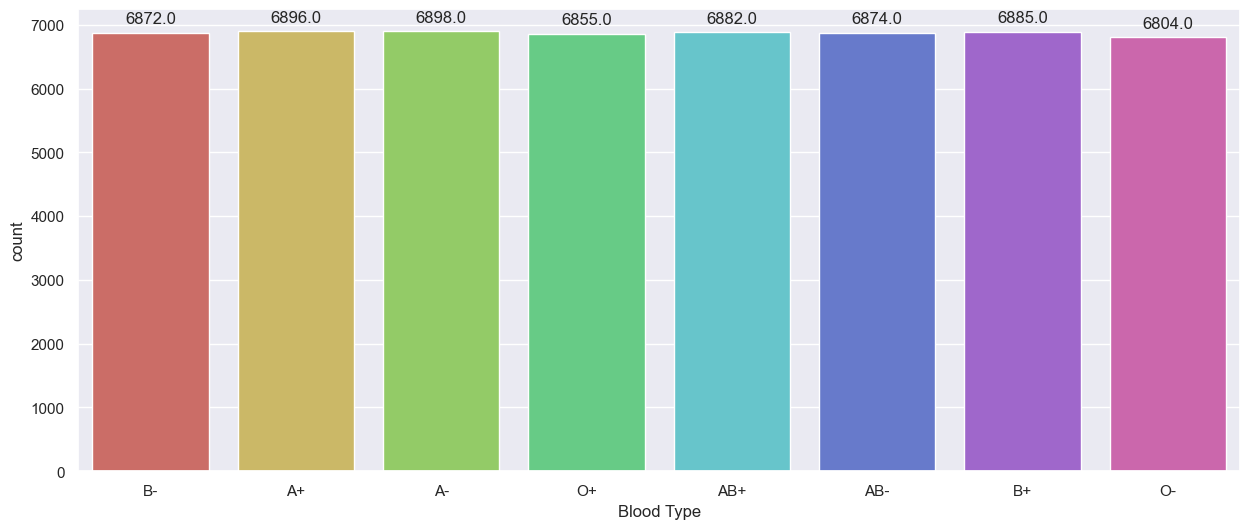

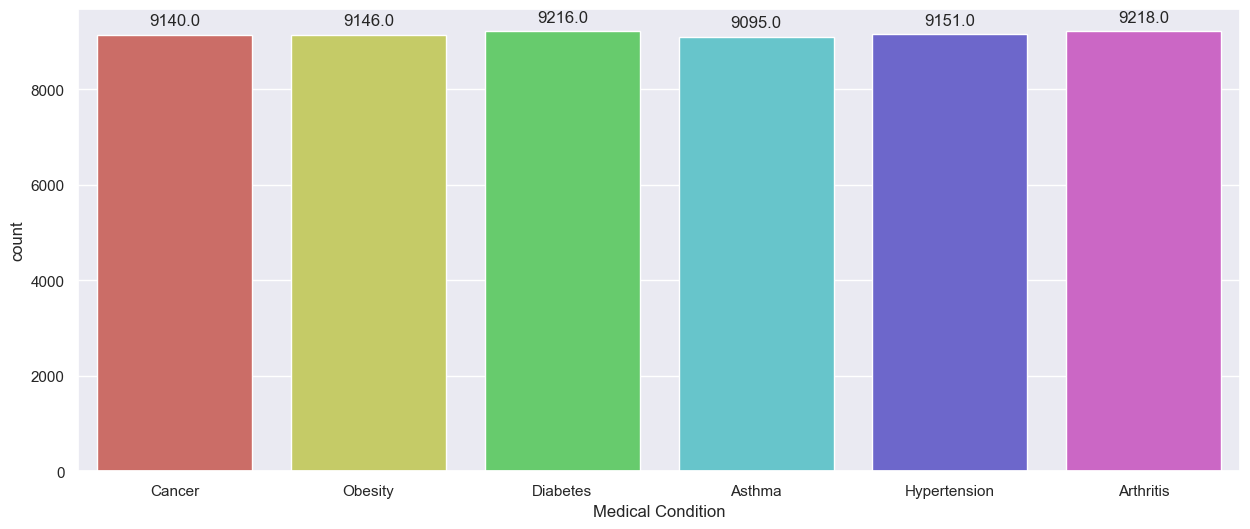

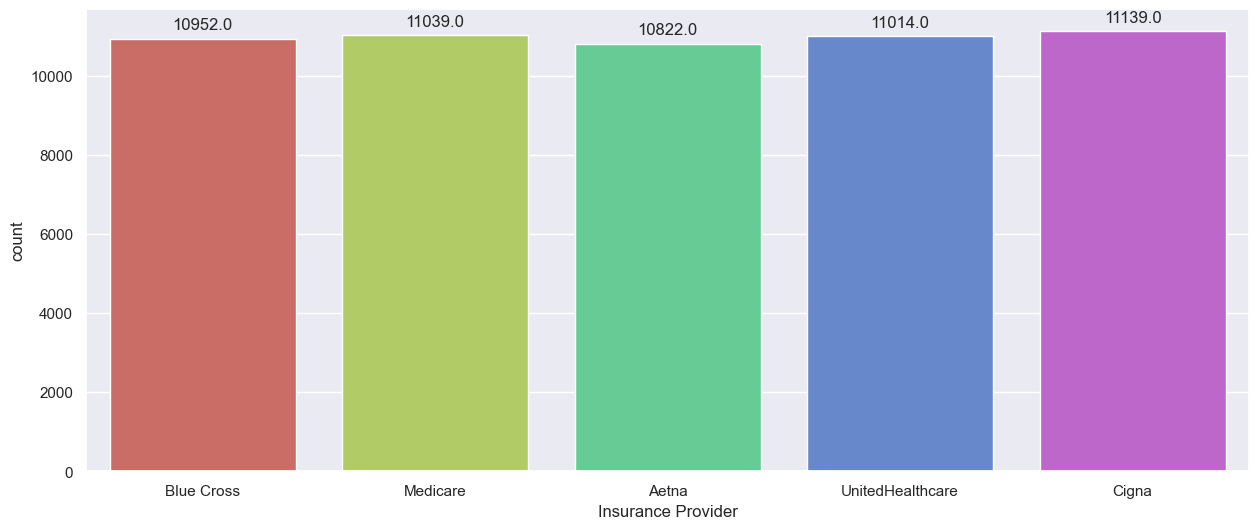

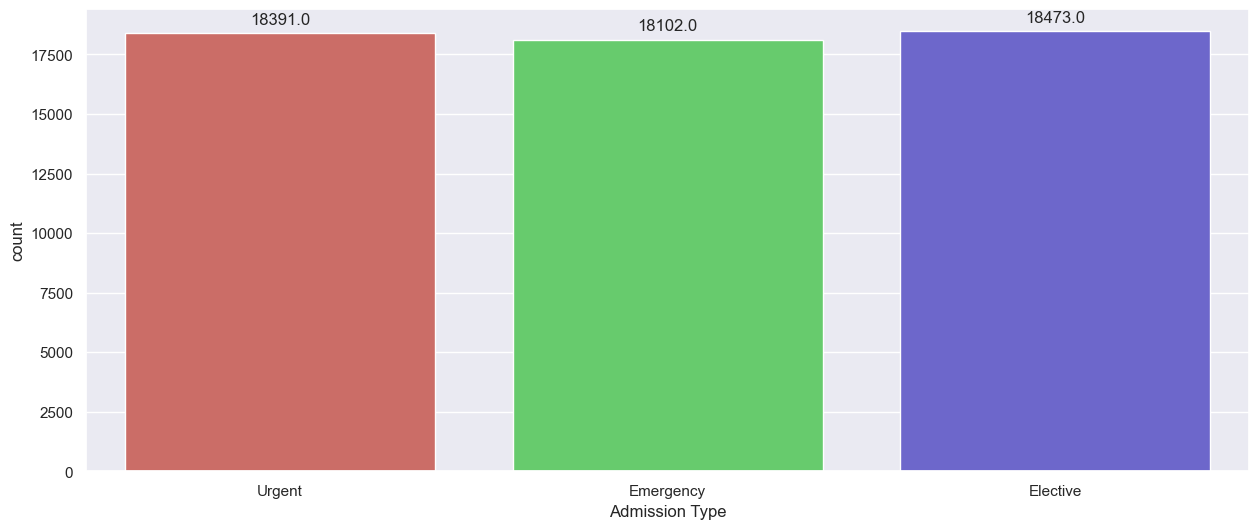

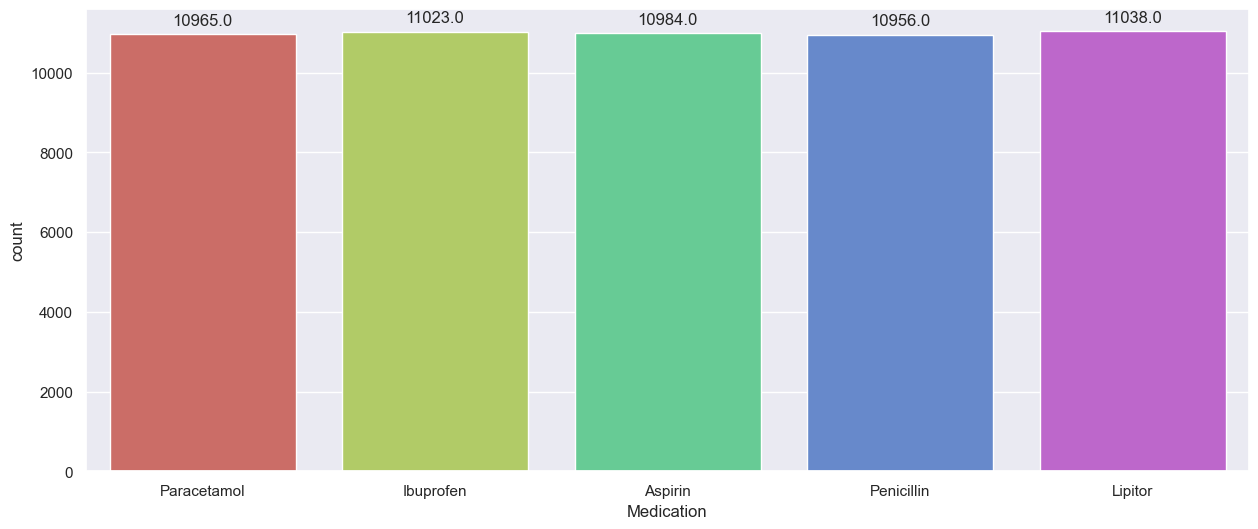

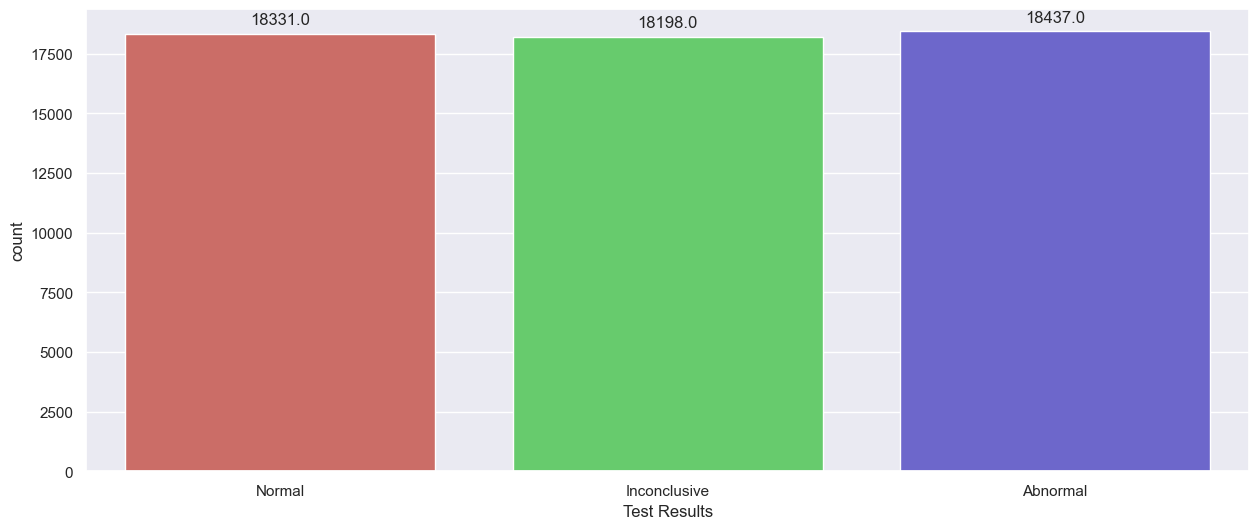

In [30]:
for i in categorical:
    plt.figure(figsize=(15,6))
    ax = sns.countplot(x=i , data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f"{height}",
                    xy= (p.get_x() + p.get_width() / 2., height),
                    xytext = (0,10),
        textcoords="offset points",
        ha= "center", va="center")
    plt.show()
                    

In [31]:
import plotly.express as px

# PIE CHART
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f"Distribution of {i}")
    fig.show()

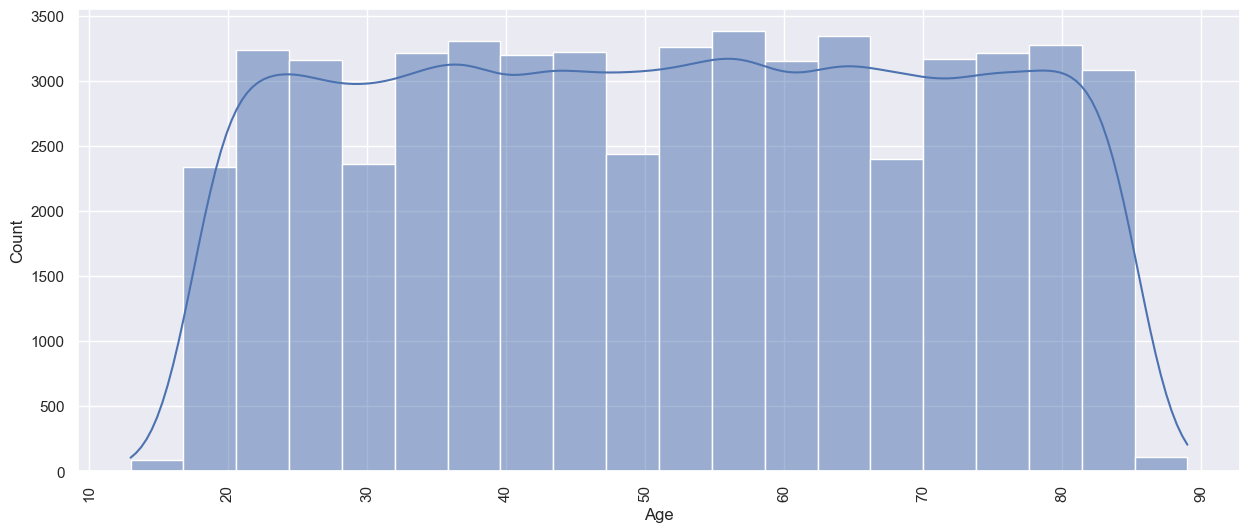

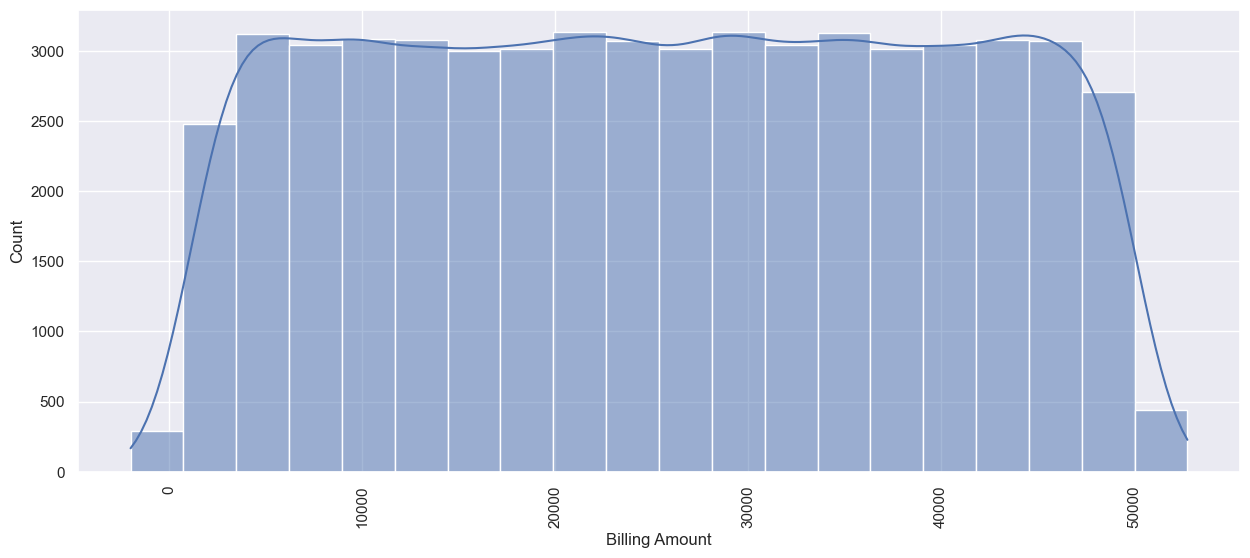

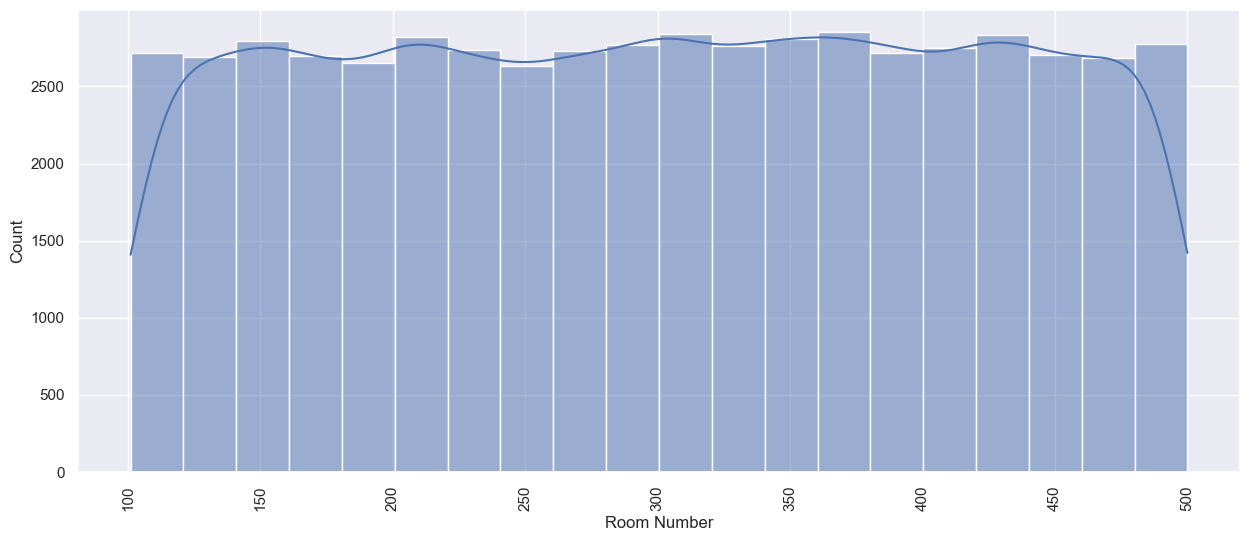

In [32]:
# HISTPLOT for continuous features
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins=20, kde=True, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

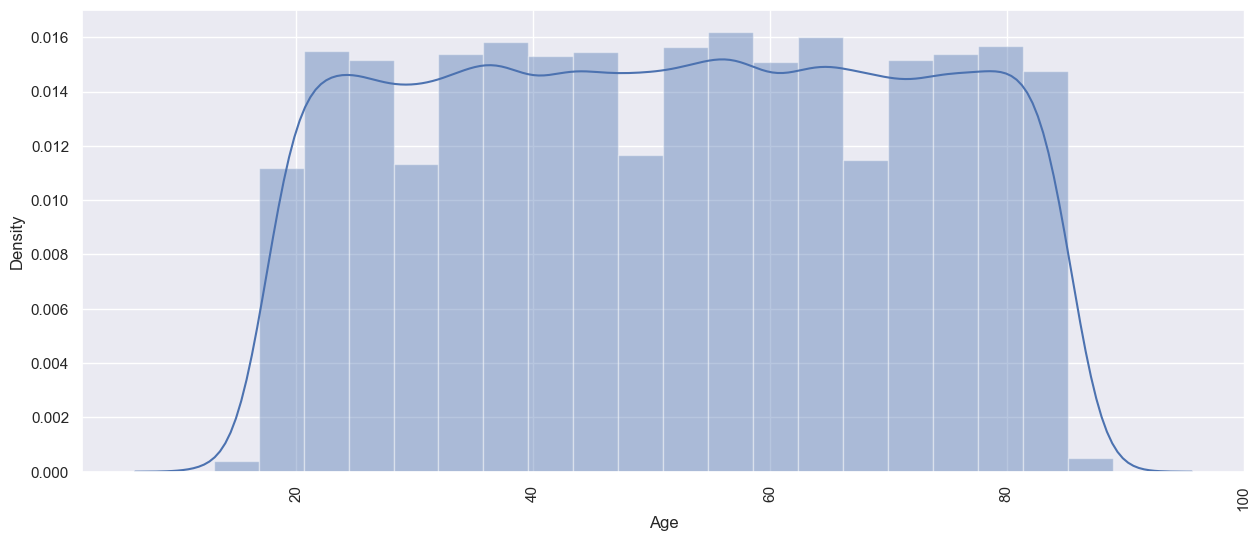

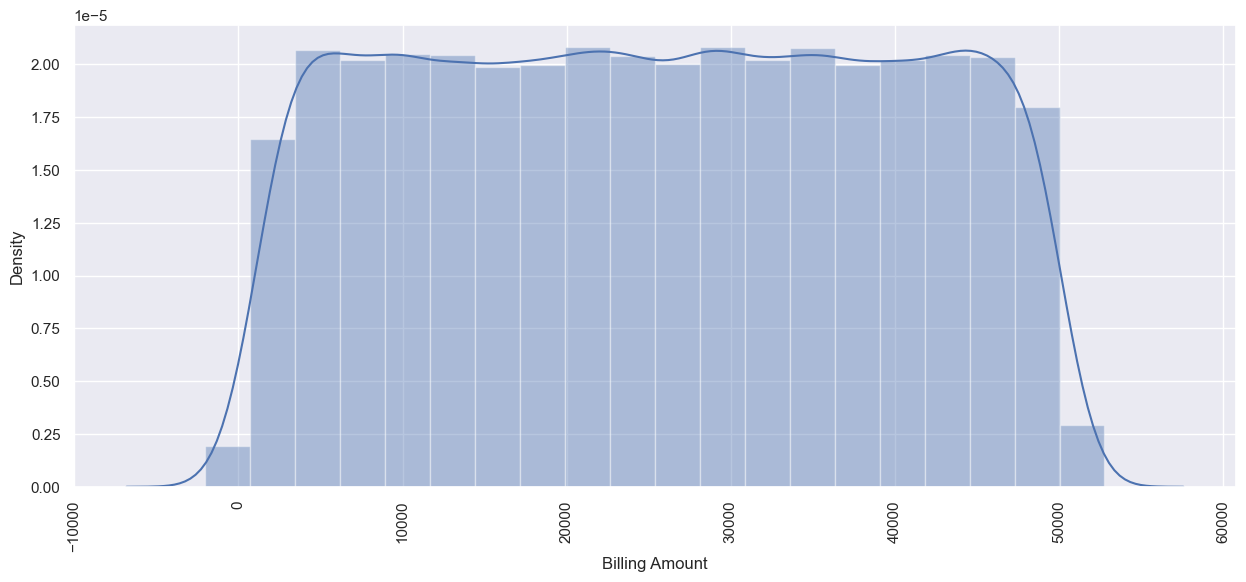

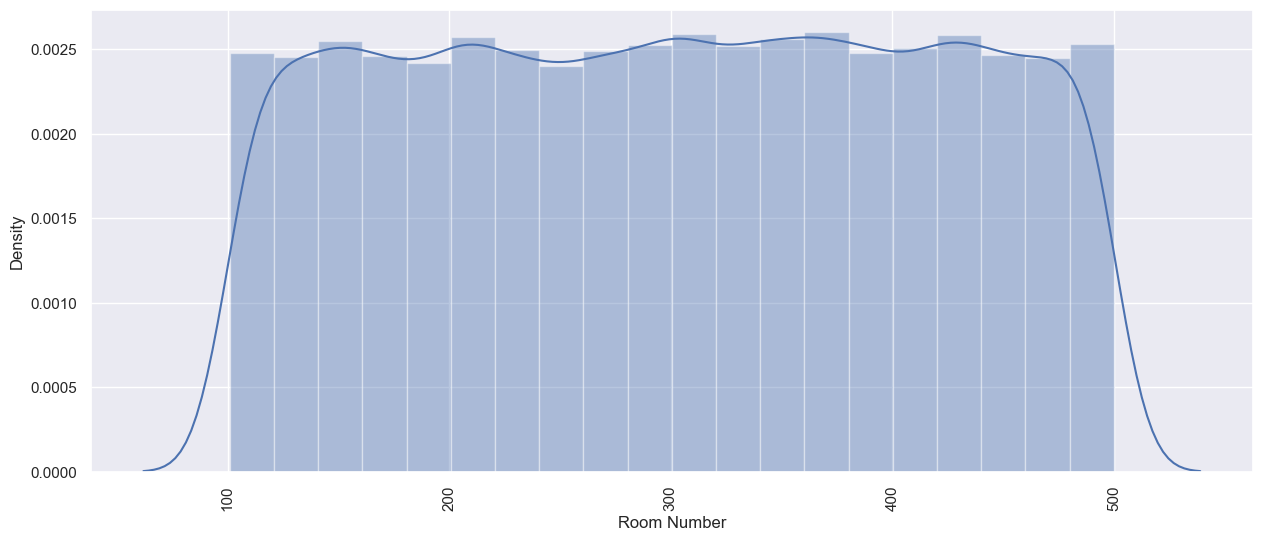

In [33]:
# DISTPLOT for continuous features
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins=20, kde=True)
    plt.xticks(rotation=90)
    plt.show()

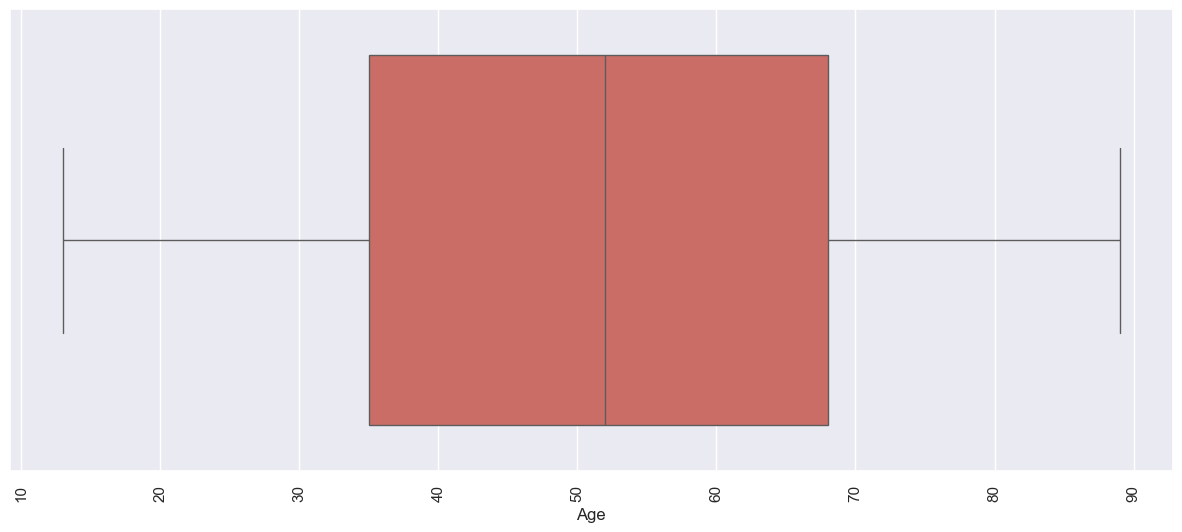

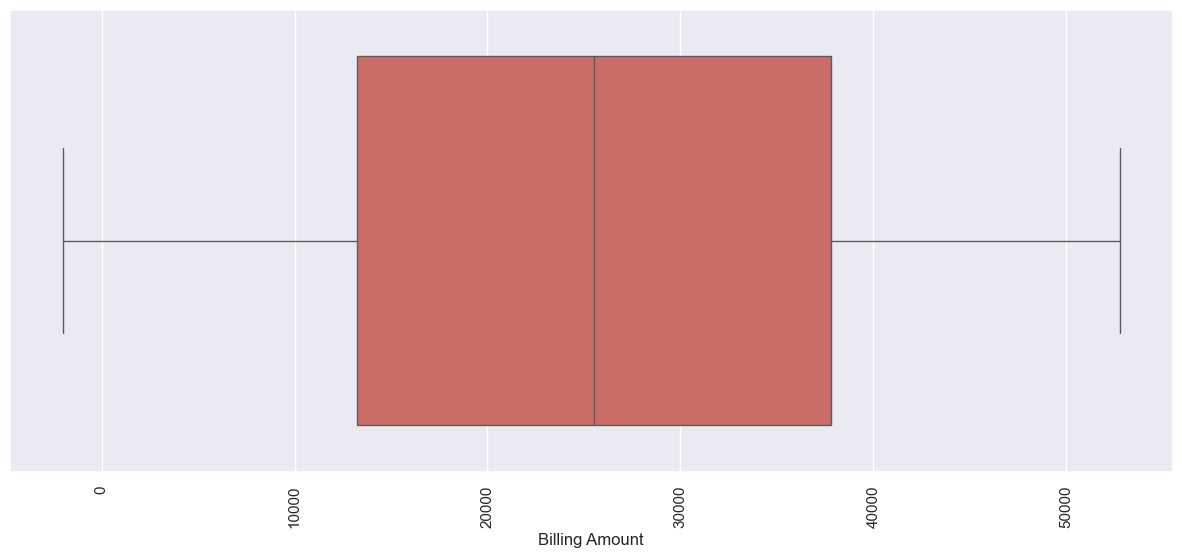

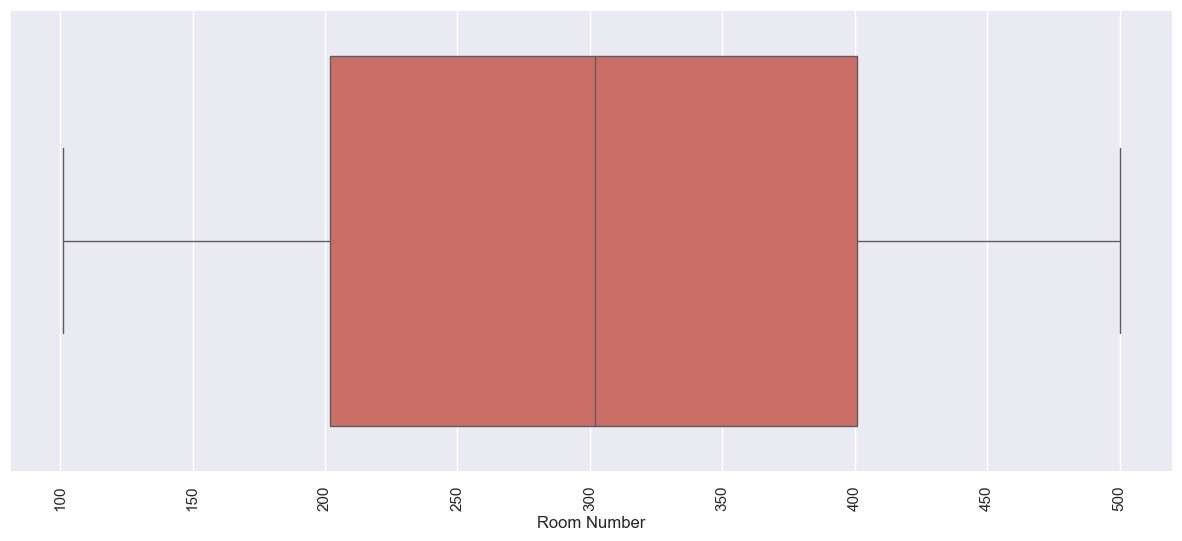

In [34]:
# BOXPLOT
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

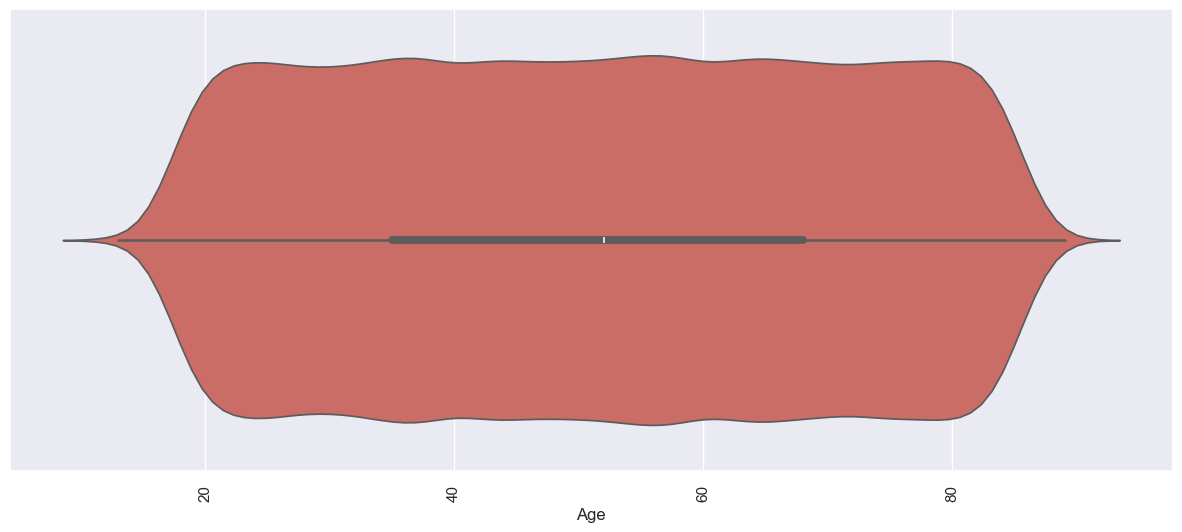

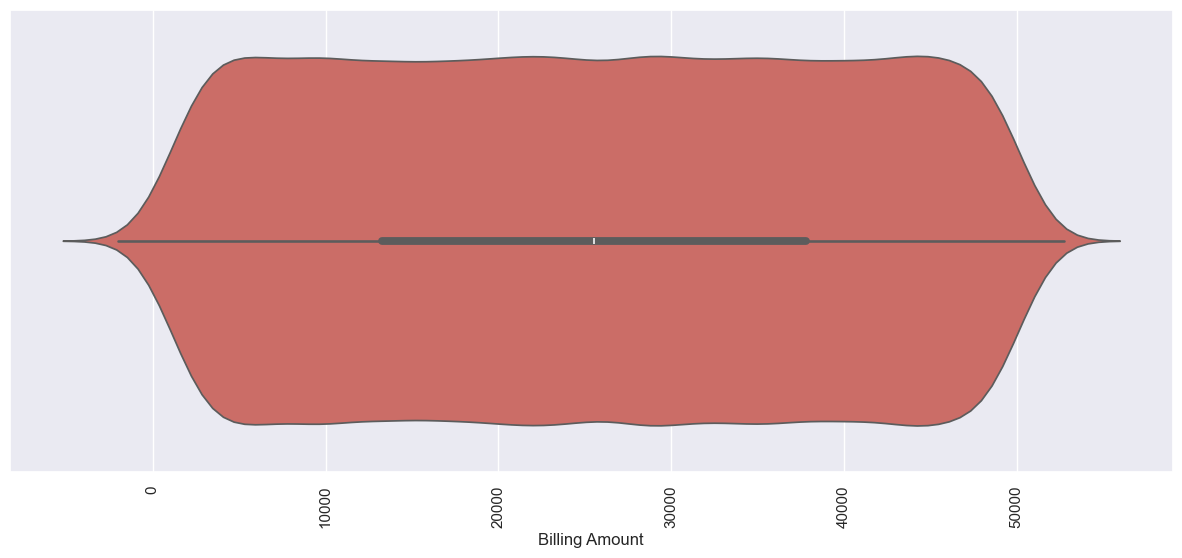

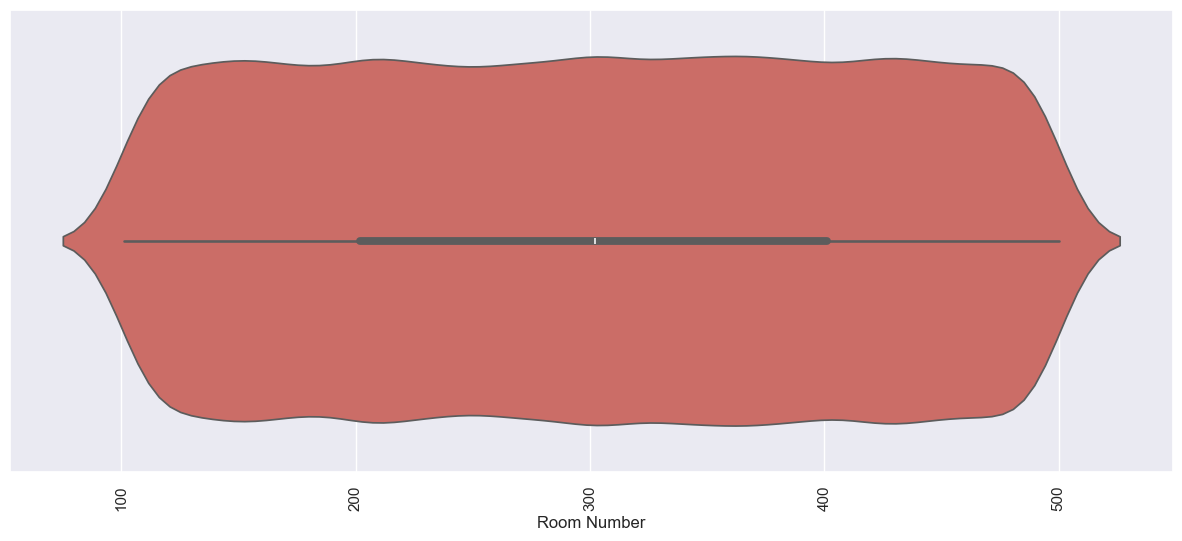

In [35]:
#Violin plot
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

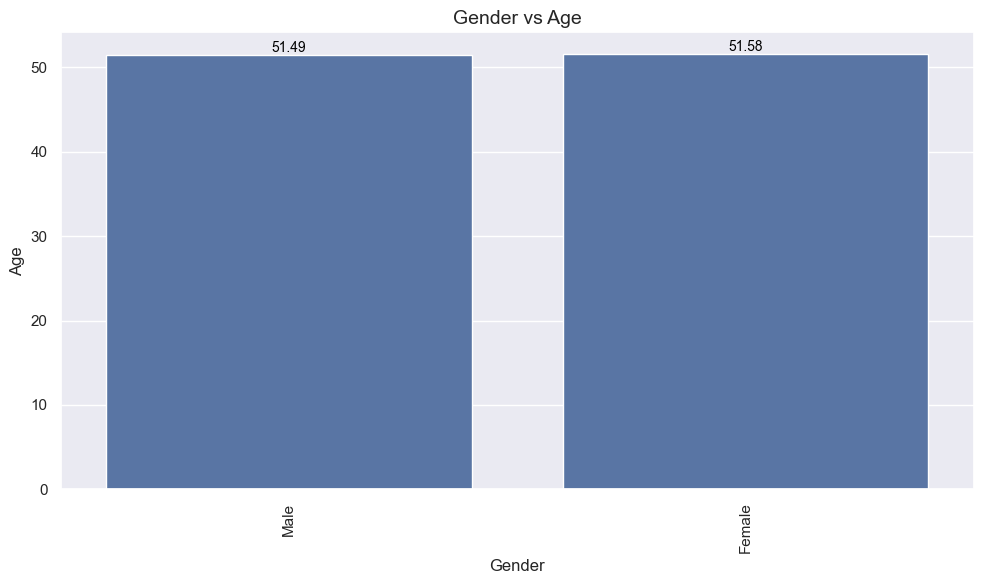

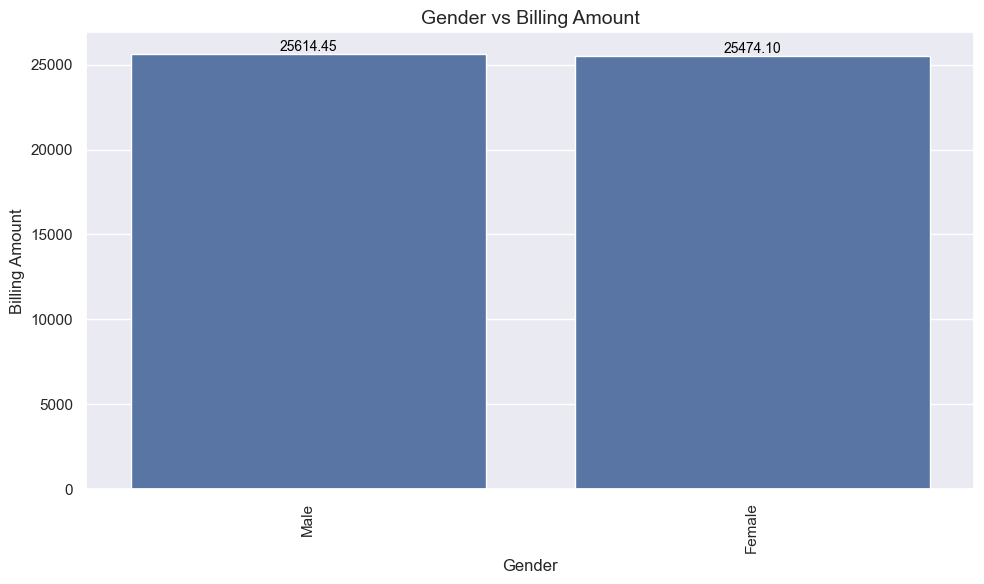

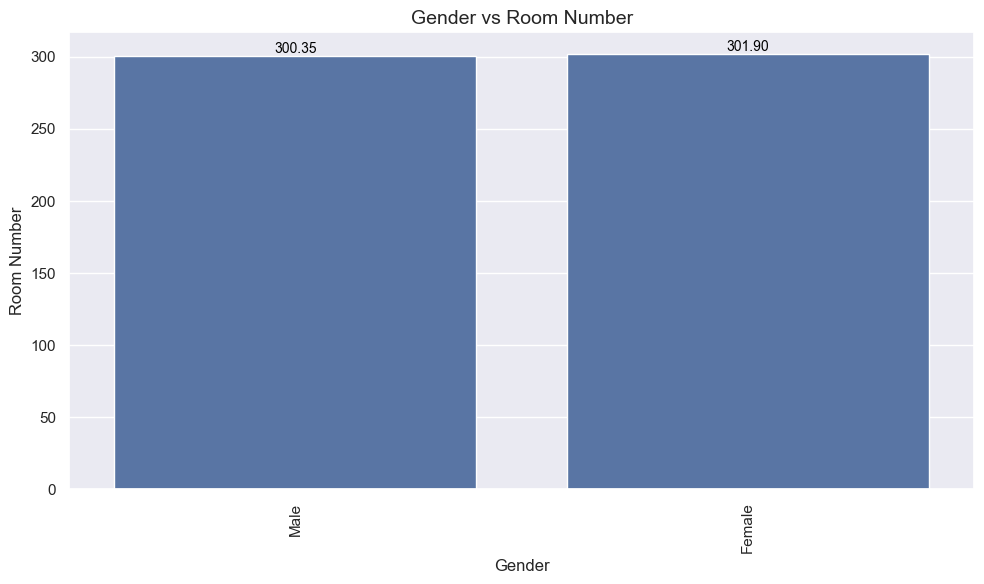

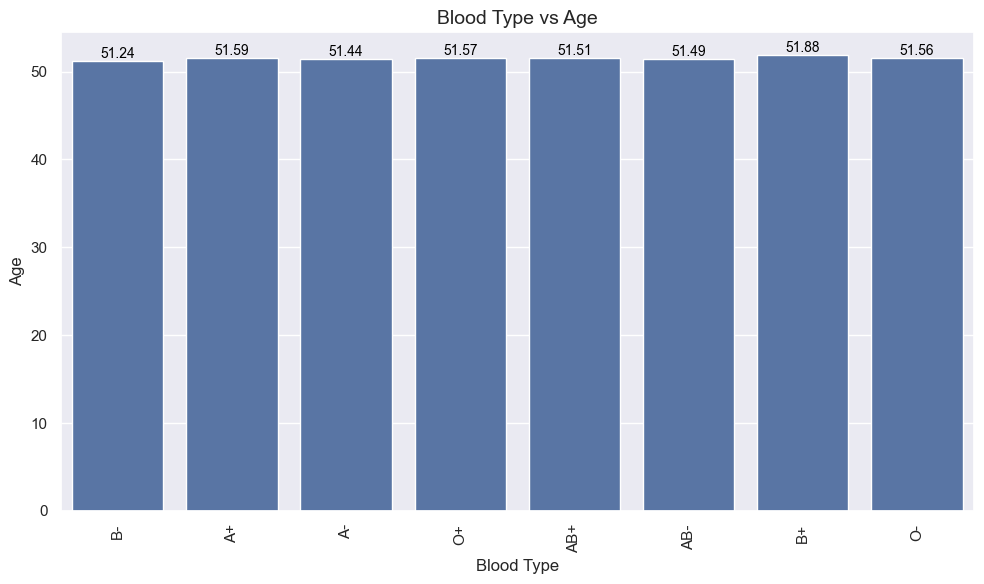

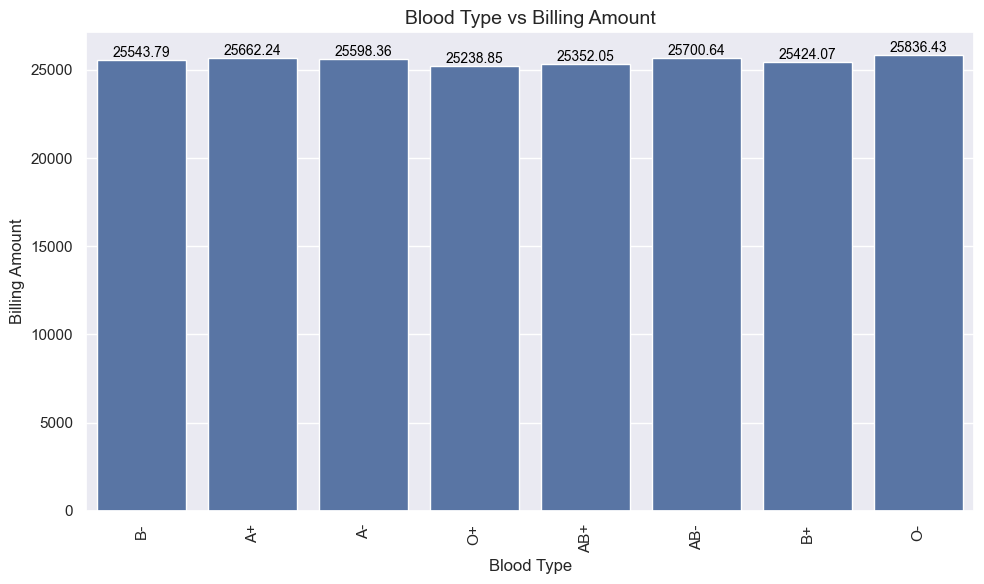

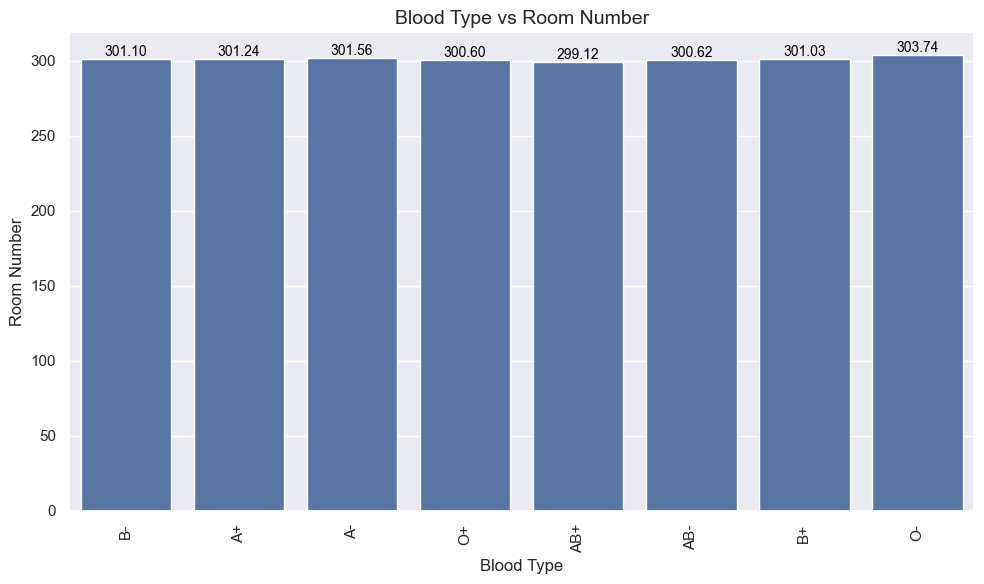

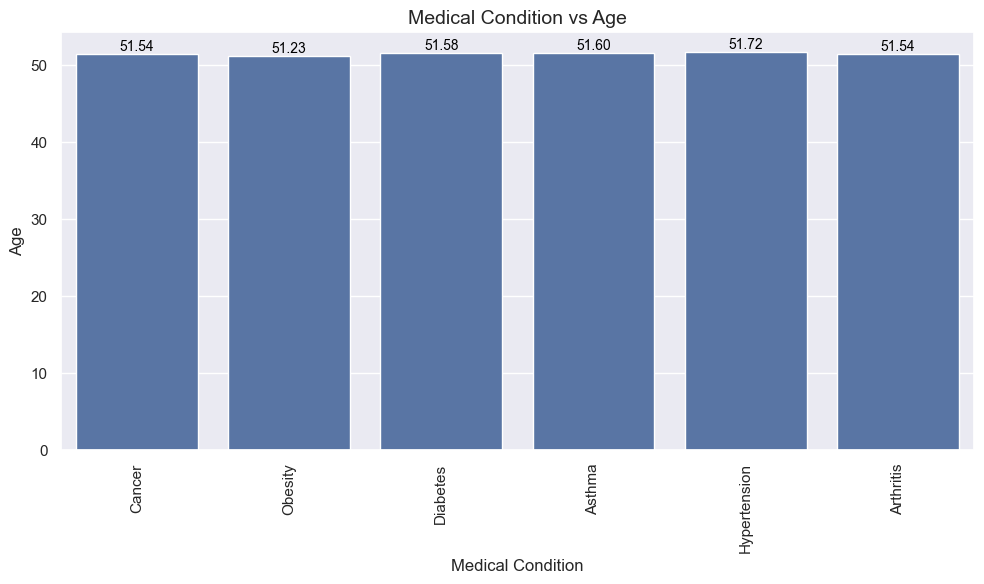

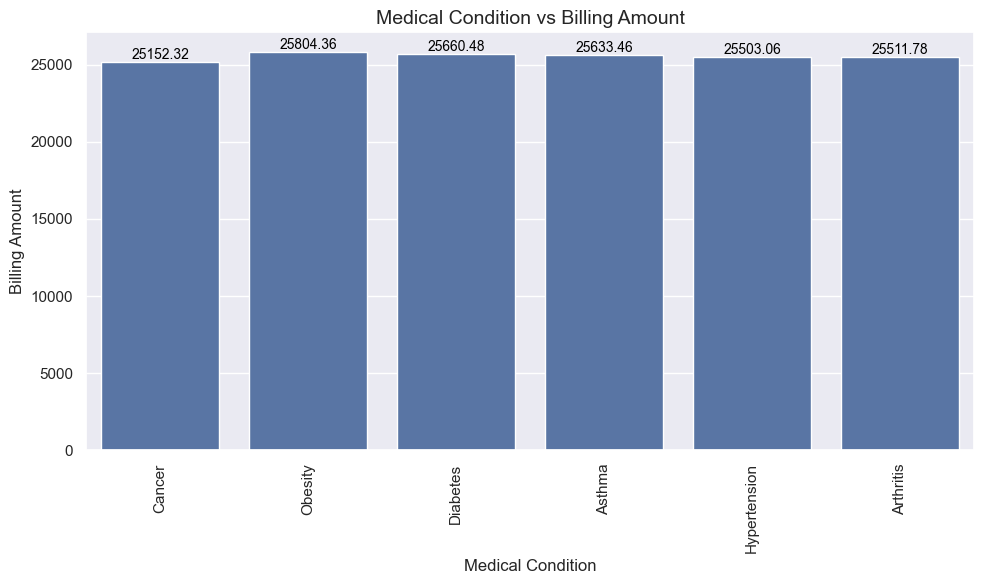

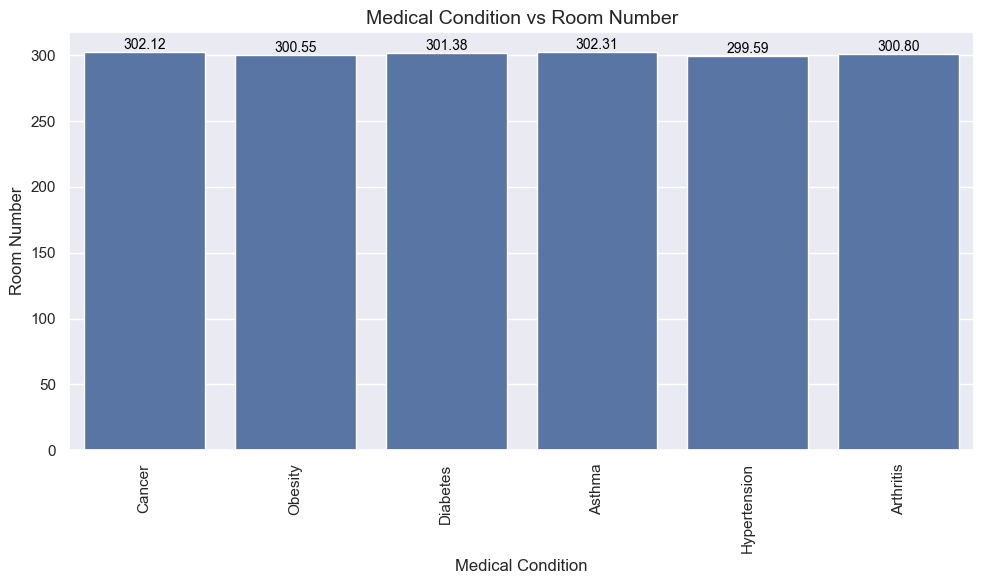

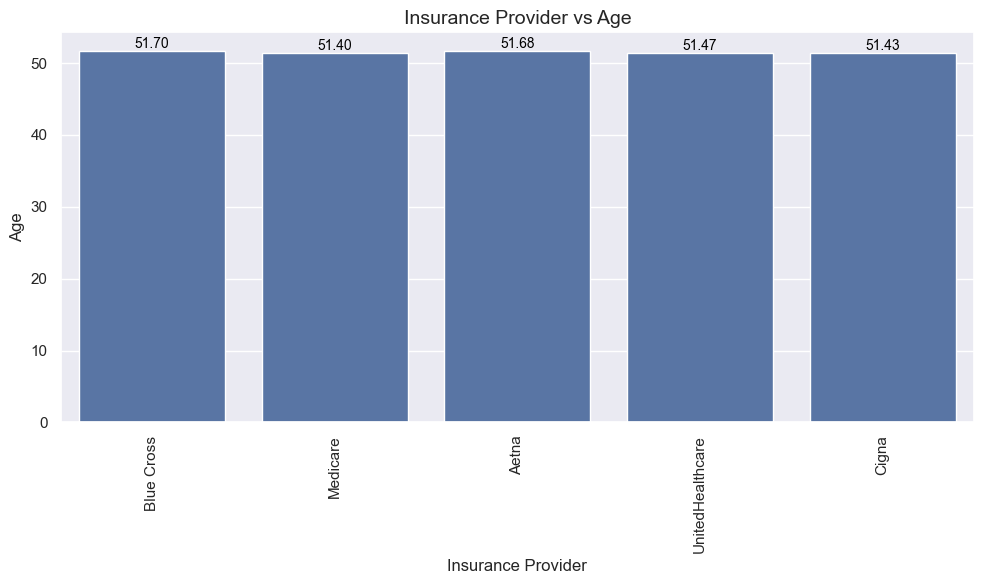

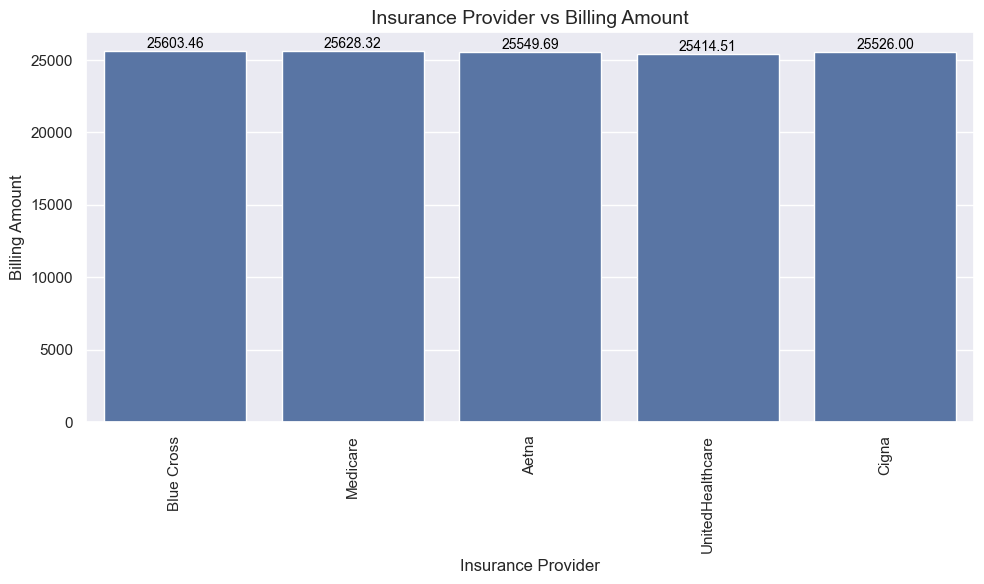

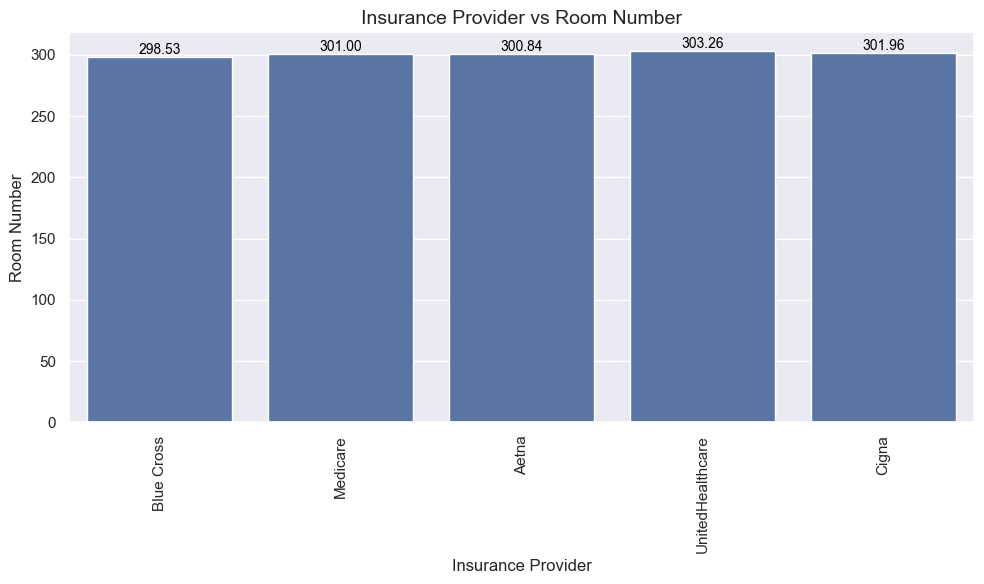

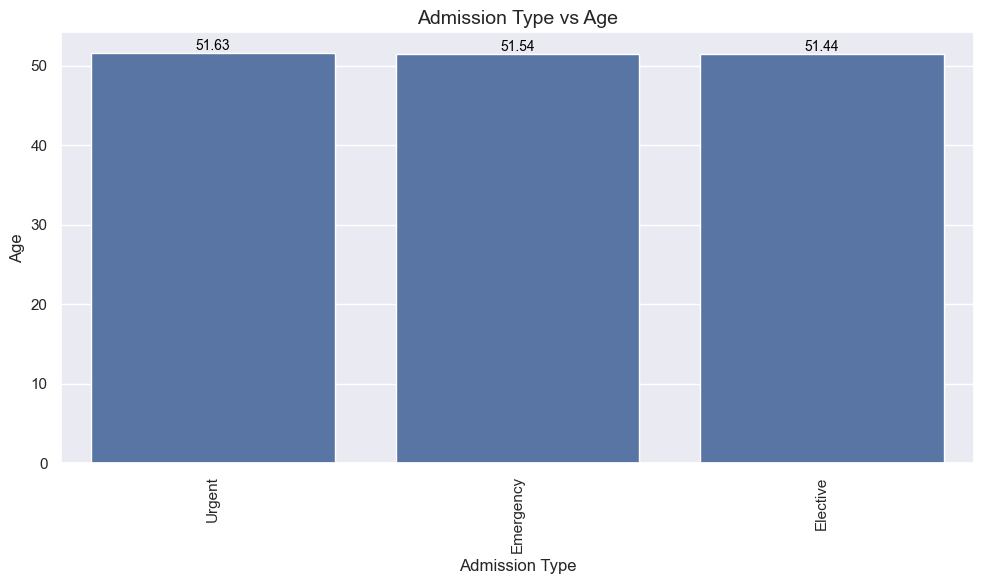

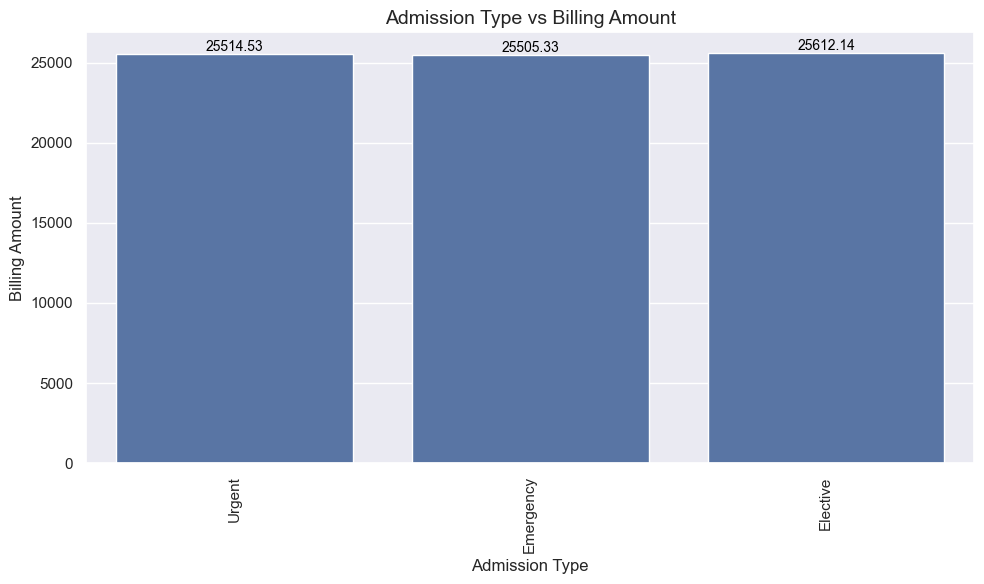

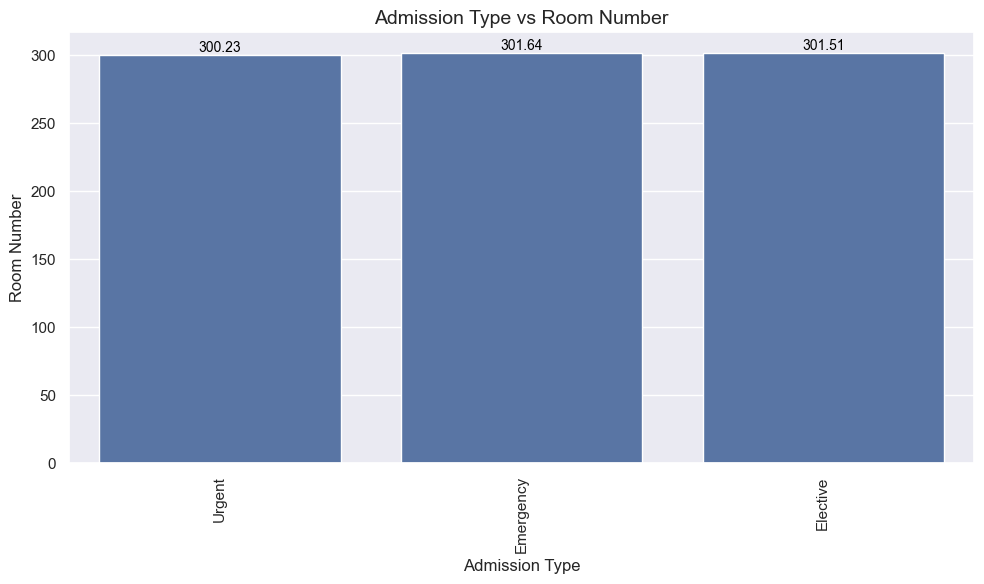

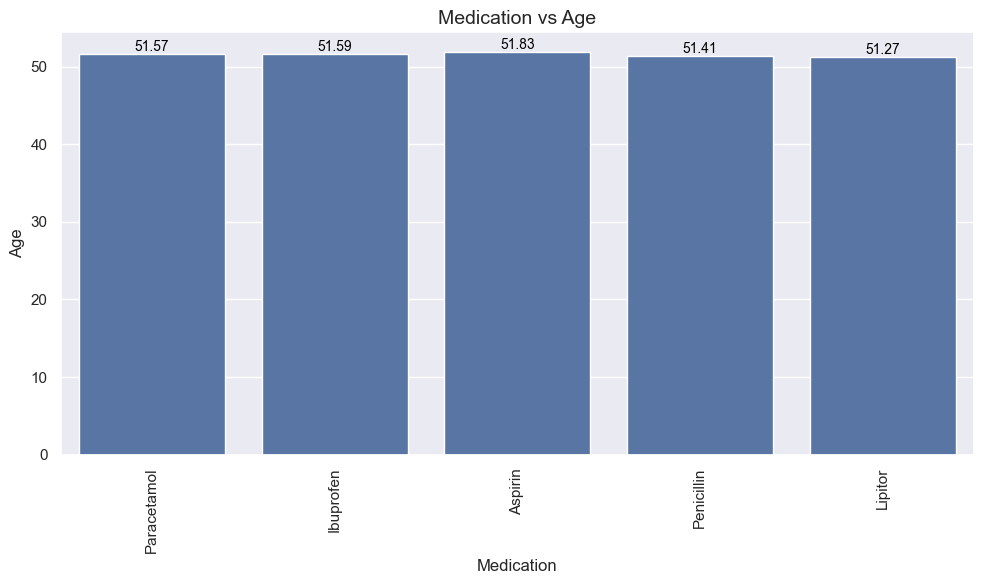

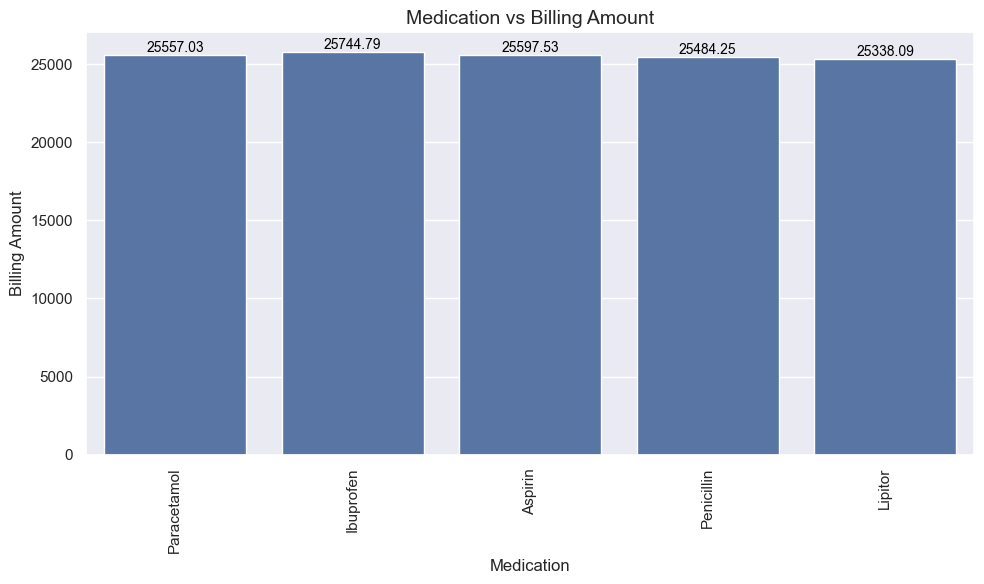

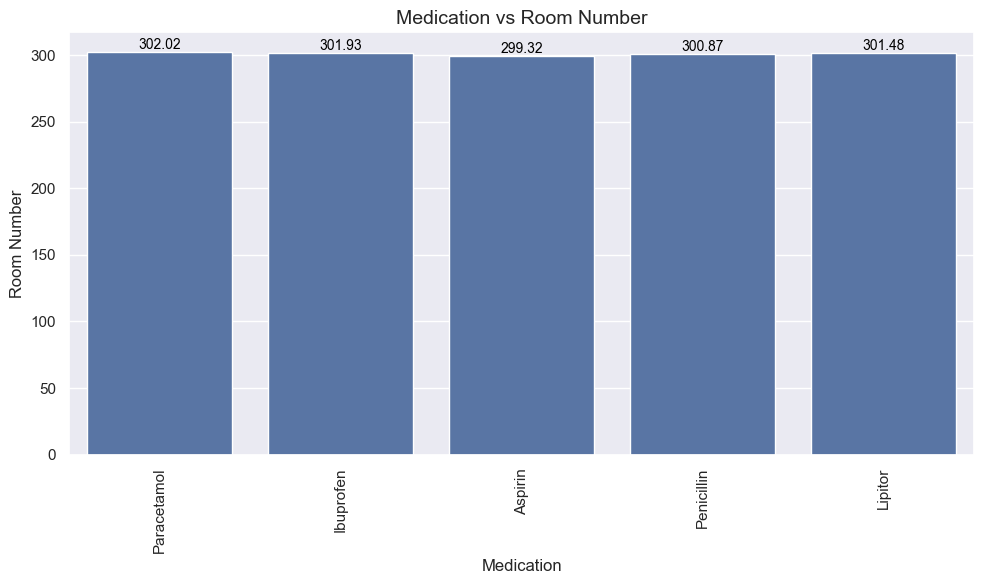

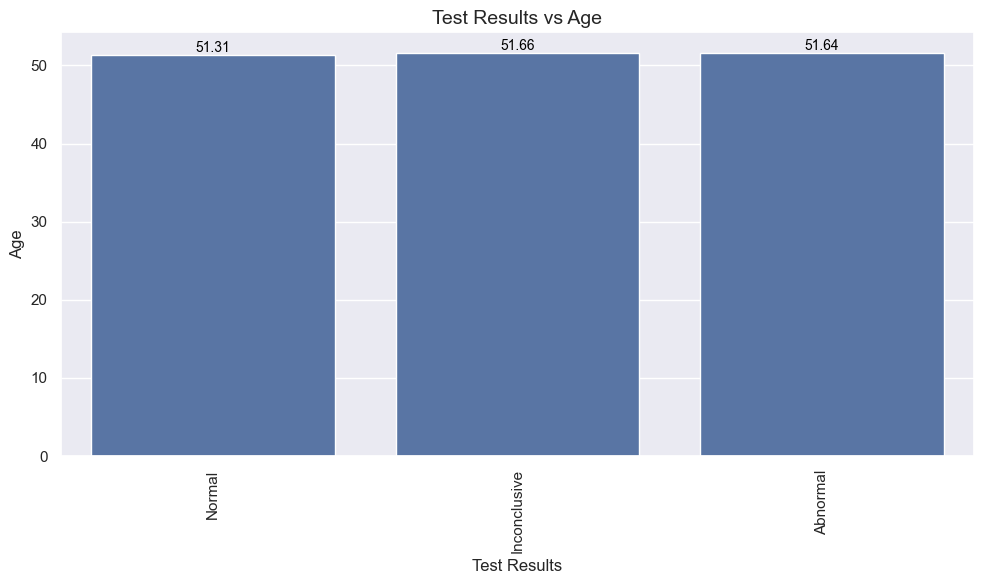

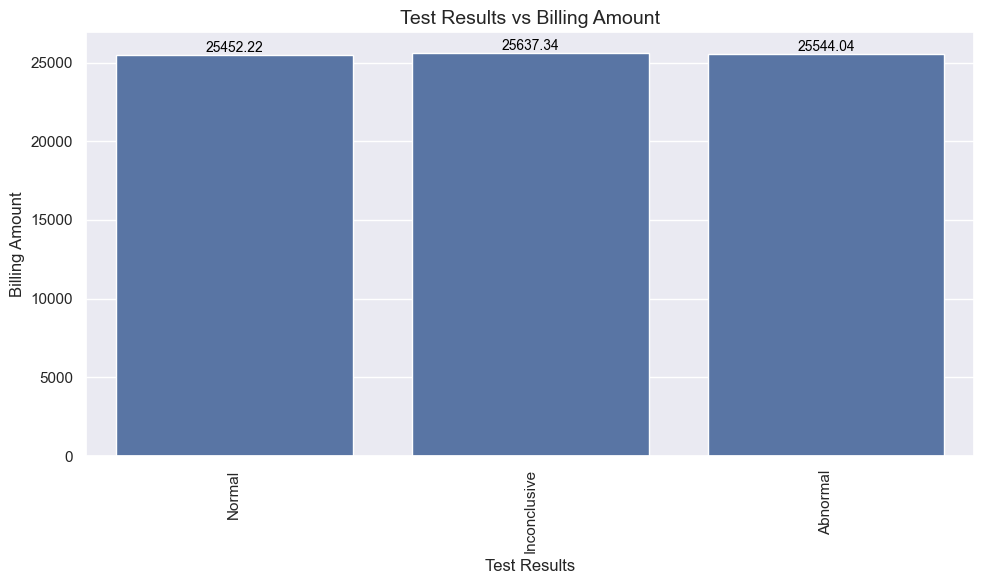

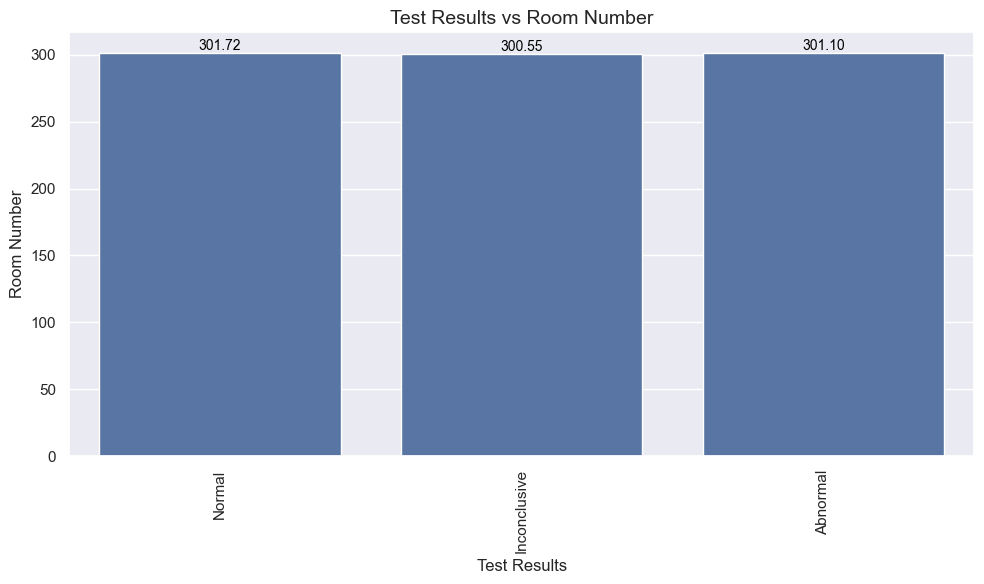

In [36]:
# for dis in categorical:
#     for cont in continuous:
#         plt.figure(figsize=(10,6))
#         ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
#         plt.title(f'{dis} vs {cont}')

#         for p in ax.patches:
#             height = p.get_height()
#             ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),  
#                         ha="center", va="bottom", fontsize=10, color='black', rotation=0)
#             plt.xticks(rotation=90)
#             plt.show()

for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}', fontsize=14)
        
        # Annotate bars
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f"{height:.2f}", (p.get_x() + p.get_width() / 2., height),  
                        ha="center", va="bottom", fontsize=10, color='black')

        plt.xticks(rotation=90)  # Rotate the x-tick labels for better readability
        plt.tight_layout()  # Avoid overlap of labels and title
        plt.show()  # Only show the plot after the inner loop is complete
            

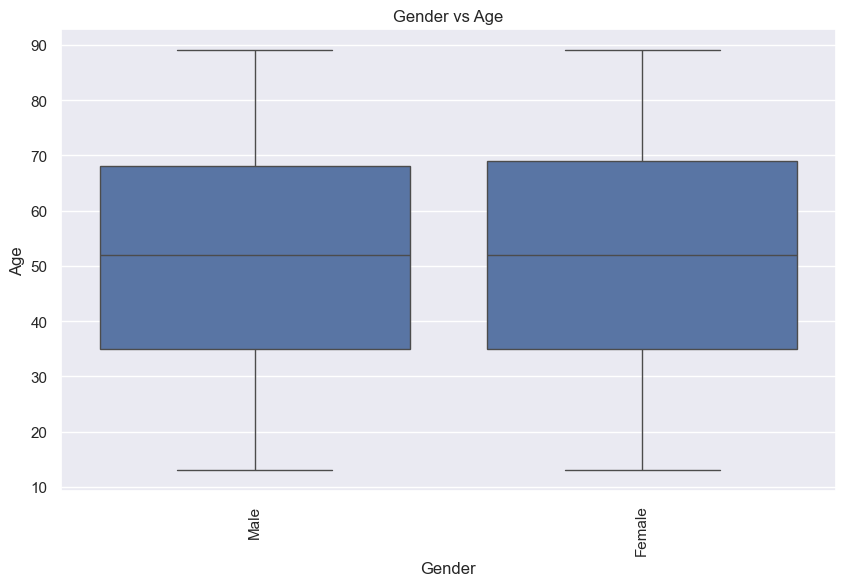

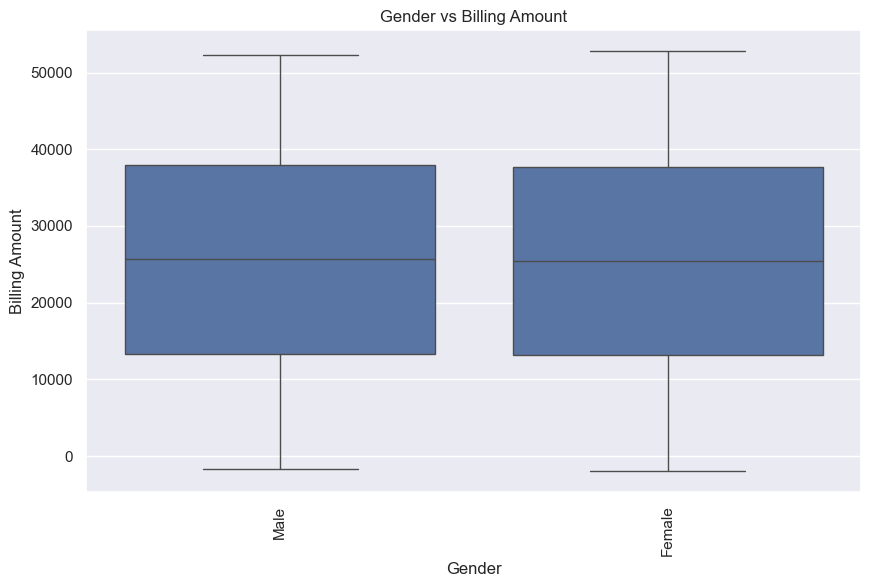

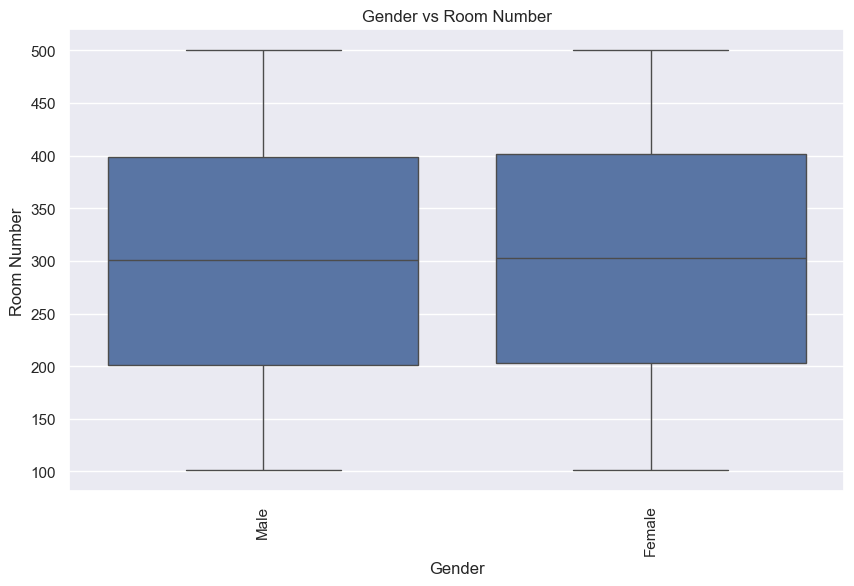

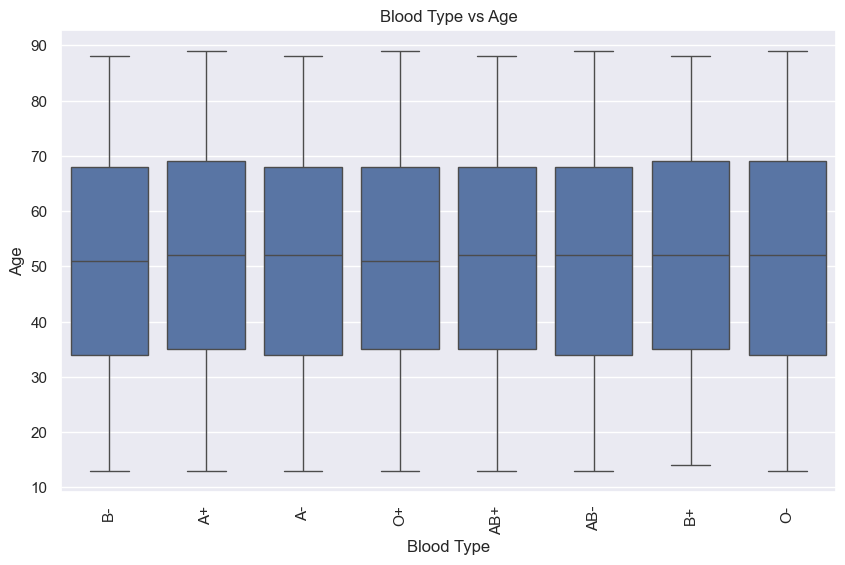

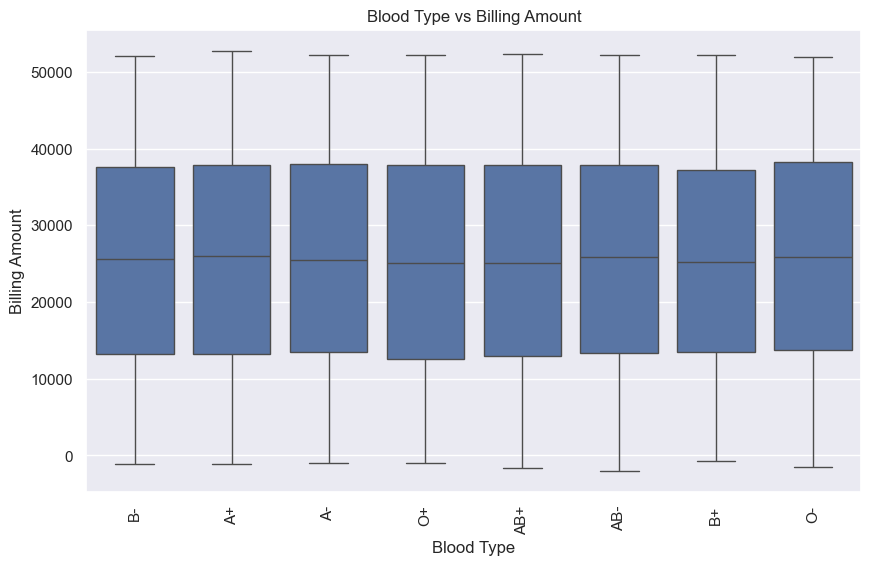

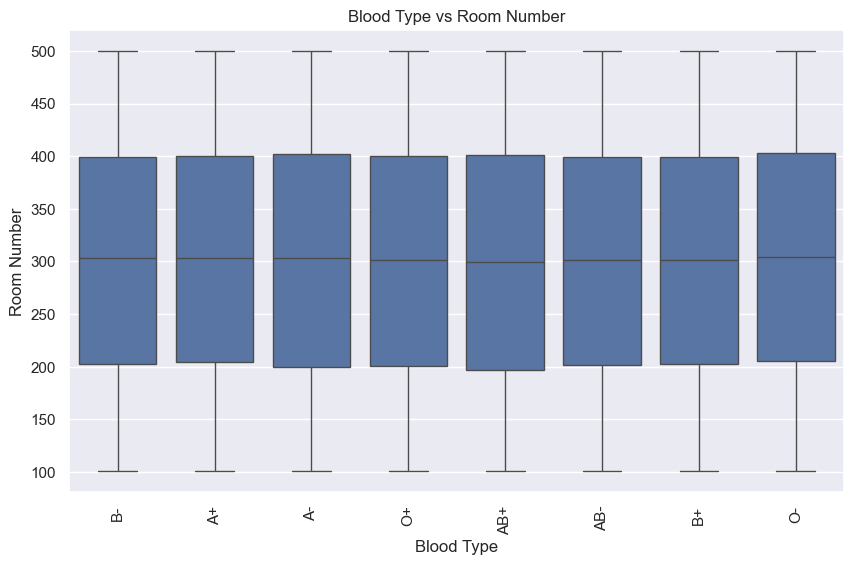

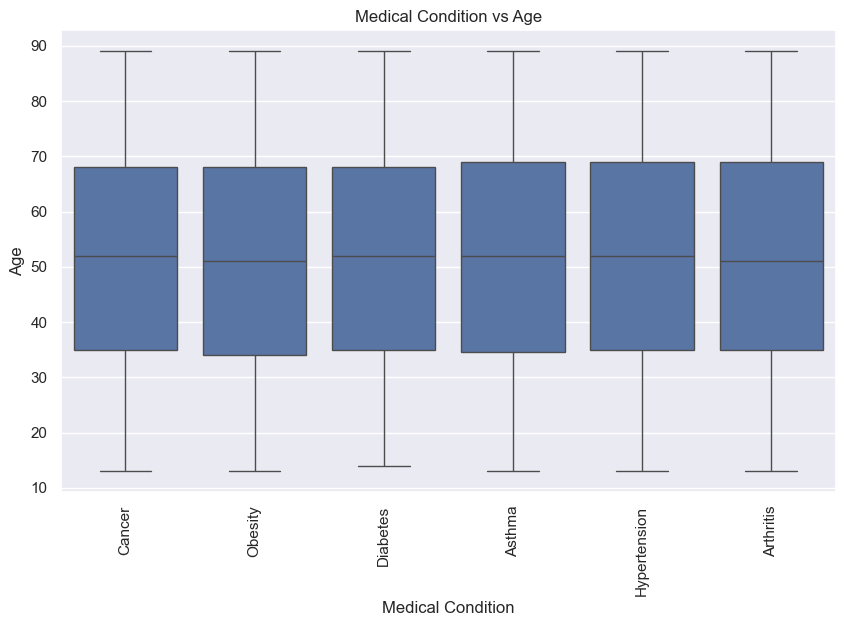

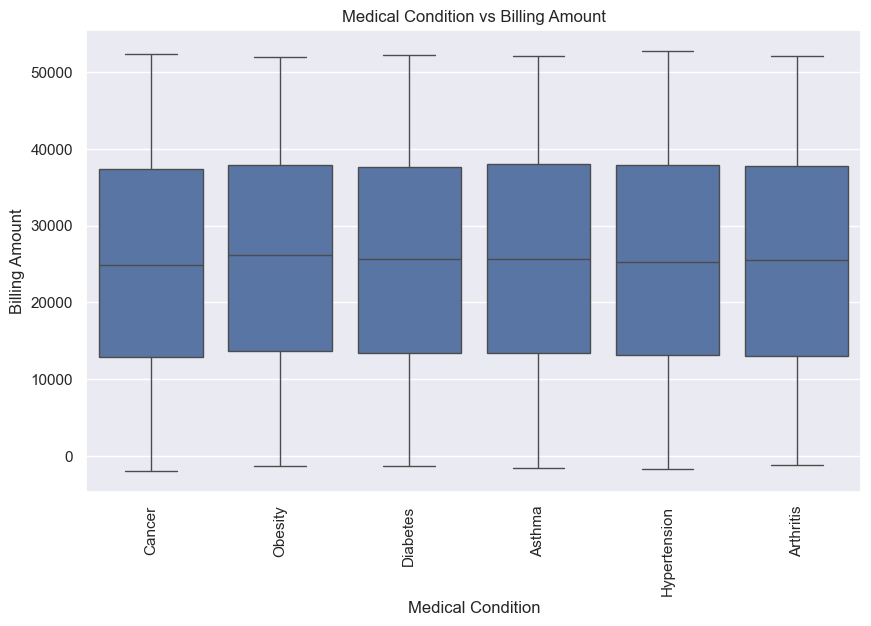

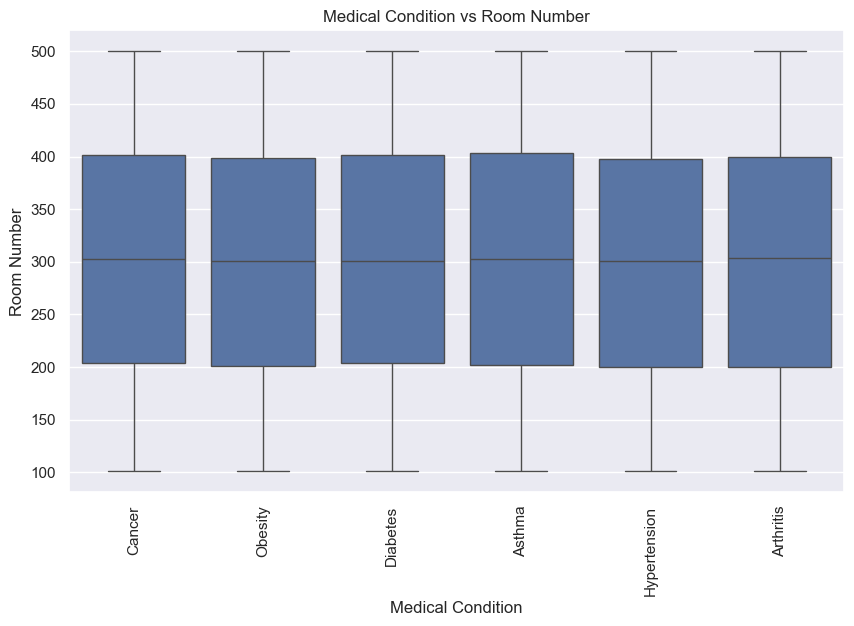

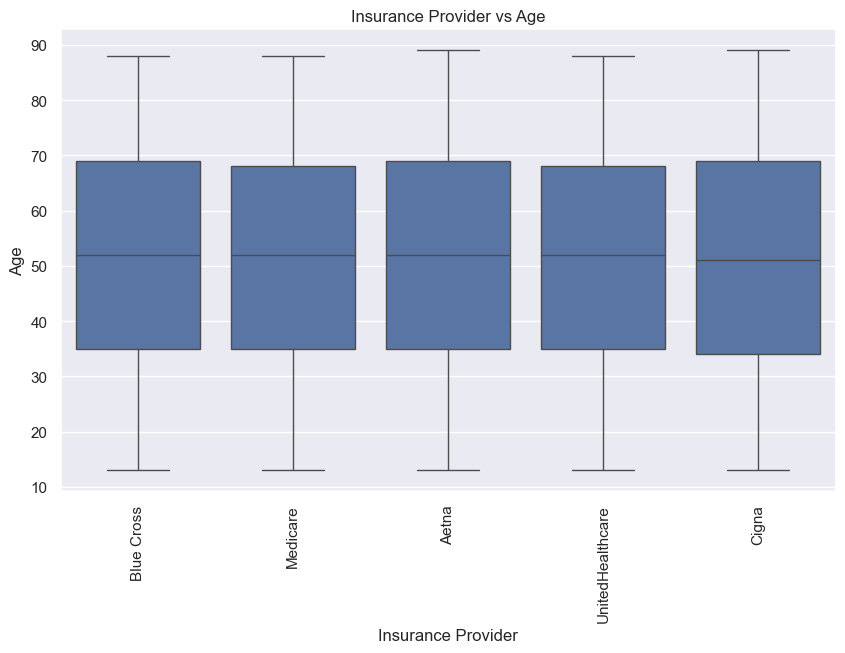

In [ ]:
# BOX PLOT
for dis in categorical:
    for cont in continuous:
        plt.figure(figsize=(10,6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f"{dis} vs {cont}")
        plt.xticks(rotation=90)
        plt.show()

In [ ]:
corr_matrix = df[continuous].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Plot of Continuous Features")
plt.show()

In [ ]:
corr_matrix

In [ ]:
from scipy.stats import f_oneway
f_stat, p_val = f_oneway(df[df['Gender']=='Male']['Billing Amount'],
                         df[df['Gender']=='Female']['Billing Amount'])
print(f"ANOVA Result: F-statistic = {f_stat}, p-value = {p_val}")

In [ ]:
df.columns

In [ ]:
df['Medical Condition'].unique()

In [ ]:
df['Admission Type'].unique()

In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Admission Type'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
df.columns

In [ ]:
# Pvalue for Age and medical cond
contingency_table = pd.crosstab(df['Age'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
# Pvalue for Gender and medical cond
contingency_table = pd.crosstab(df['Gender'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
# Pvalue for Blood Type and medical cond
contingency_table = pd.crosstab(df['Blood Type'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
# Pvalue for Billing Amount and medical cond
contingency_table = pd.crosstab(df['Billing Amount'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:

# Pvalue for Insurance Provider and medical cond
contingency_table = pd.crosstab(df['Insurance Provider'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
df.columns

In [ ]:
# Pvalue for Admission Type and medical cond
contingency_table = pd.crosstab(df['Admission Type'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
# Pvalue for Medication and medical cond
contingency_table = pd.crosstab(df['Medication'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:

# Pvalue for Discharge Date and medical cond
contingency_table = pd.crosstab(df['Discharge Date'], df['Medical Condition'])
contingency_table

In [ ]:
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-Square Test result : chi2={chi2}, p-value={p}")

In [ ]:
fig = px.scatter_3d(df, x='Age', y='Billing Amount', z='Room Number', color='Gender')
fig.show()

In [ ]:
df.columns

In [ ]:
# Create granular pivot table
pivot_table =pd.pivot_table(df, values=['Billing Amount', 'Age'],
                            index = ['Gender', 'Medication','Admission Type'],
                            aggfunc={'Billing Amount':'mean', 'Age':'mean'})

In [ ]:
pivot_table

In [ ]:
pivot_table_sum = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Insurance Provider','Test Results'],
                            aggfunc='sum', margins=True)
pivot_table_sum

In [ ]:
pivot_table_multi = pd.pivot_table(df, values=['Billing Amount'],
                            index = ['Medical Condition','Gender'],
                            aggfunc=['sum','mean','count','min','max'], margins=True)
pivot_table_multi

In [ ]:
Grouped_data = df.groupby(['Gender','Medical Condition']) [['Billing Amount','Age']].mean()

Grouped_data

In [ ]:
# Example to see median, Std. We also can check for variance, mode, quartile 1, Quartile2, interquartile range,+ve & -ve quartilerange,  kutosis value
grouped_data_custom = df.groupby('Admission Type')['Billing Amount'].agg([('median', 'median'),
                                                                         ('Standard Deviation', 'std')])
grouped_data_custom

In [ ]:
pd.crosstab(df['Admission Type'],df['Insurance Provider']).plot(kind='bar',stacked=True)

In [ ]:
df.columns

In [ ]:
pd.crosstab(df['Blood Type'],df['Medical Condition']).plot(kind='bar',stacked=True)

In [ ]:
df.info()

In [ ]:
# check all DType
# handle Date of Admission as it cannot be object. Its a special type of a number
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])

In [ ]:
df.info()

In [ ]:
# do data augmentation ( if there is less data, how to make it more)
# Split date in day, month and year
df['Admission Day']  = df['Date of Admission'].dt.day
df['Admission Month']  = df['Date of Admission'].dt.month
df['Admission Year']  = df['Date of Admission'].dt.year

In [ ]:
df.head()

In [ ]:
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'], format='%d-%m-%Y')

In [ ]:
df['Discharge Day'] = df['Discharge Date'].dt.day
df['Discharge Month'] = df['Discharge Date'].dt.month
df['Discharge Year'] = df['Discharge Date'].dt.year

In [ ]:
df.head()

In [ ]:
df['Days'] = df['Discharge Date'] - df['Date of Admission']
df.head()

In [ ]:
# Drop columns which are not required in multi classification type of problem
# Name is not required for building algorithm
# date of admission is not required as its already splitted in d, m, Y
# Doctor is not required as its just a name and its not required in building algo. It will not help as its similar to patient name
# Hospital is a name so not required
# Insurance provider is a name so not required
# Room Number is a name of room so not required
# Discharge Date is not required as its already splitted

df = df.drop(['Name','Date of Admission','Doctor','Hospital','Insurance Provider','Room Number',
             'Discharge Date'], axis=1)


In [ ]:
df.head()

In [ ]:
# Only when disccharge happend than only billing amount happendand so its not required in building algo. Billing amt does not help in deciding test result
# When we have already days column(patient admitted in hospital) than the coulmns like 'Admission Day','Admission Month', 'Admission Year', 'Discharge Day',
# Discharge Month','Discharge Year'

In [ ]:
df.columns

In [ ]:
df = df.drop(['Billing Amount','Admission Day',
       'Admission Month', 'Admission Year', 'Discharge Day', 'Discharge Month',
       'Discharge Year'], axis=1)

In [ ]:
df.head()

In [ ]:
# Days column have text days and should be removed
df['Days'] = df['Days'].astype(str)
df['Days_numeric'] = df['Days'].str.split().str[0].astype(int)

In [ ]:
df.head()

In [ ]:
df = df.drop('Days', axis=1)

In [ ]:
df.head()

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features :", categorical)
print("***************")
print("Non-Categorical Features :", non_categorical)
print("***************")
print("Discrete Features :", discrete)
print("***************")
print("Continuous Features :", continuous)
print("***************")

In [ ]:
categorical_features = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication']

In [ ]:
categorical_features


In [ ]:
df_dummies = pd.get_dummies(df[categorical_features], drop_first=True)

In [ ]:
df_dummies

In [ ]:
df.head()

In [ ]:
df = pd.concat([df.drop(columns=categorical_features),df_dummies], axis=1)

In [ ]:
df.head()

In [ ]:
df['Test Results'].value_counts()

In [ ]:
test_result_mapping = {'Normal':0,'Inconclusive':2,'Abnormal':1}

In [ ]:
df['Test_Result_Numeric'] = df['Test Results'].replace(test_result_mapping)

In [ ]:
df.head()

In [ ]:
df = df.drop(['Test Results'], axis=1)

In [ ]:
df.head()

In [ ]:
df['Age'].describe()

In [ ]:
df['Days_numeric'].describe()

In [ ]:
# split into dependent variable and independent variable
x = df.drop('Test_Result_Numeric', axis=1)
x.head()

In [ ]:
y = df['Test_Result_Numeric']
y.head()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify= y) # Always write stratify=y

## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

In [ ]:
y_pred = lr_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)
# Accuracy is very low as data is static and only for few medeical conditions

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Above confusuion matrix show huge mis prediction values like 1314, 1308,1392,914,915) except the diagonal values which were correctly predicted by model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

In [ ]:
y_pred_dt = dt_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_dt)
report = classification_report(y_test, y_pred_dt)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

In [ ]:
y_pred_rf = rf_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
xg_model = XGBClassifier()
xg_model.fit(x_train, y_train)

In [ ]:
y_pred_xg =xg_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred_xg)
report = classification_report(y_test, y_pred_xg)
print(f"Accuracy {accuracy:.2f}")
print("Classification Report :")
print(report)

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_xg), annot=True, fmt='d', cmap='Blues',
           xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# please do feature scalling with your dataset and then perform deep learning
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
# pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense


In [ ]:
# please do feature scalling with your dataset and then perform deep learning
# from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# This means that the model is built layer by layer, where each layer has exactly one input tensor and one output tensor. 
# This is the simplest way to create a neural network in Keras.
model = Sequential()

#
model.add(Dense(128, activation='relu', input_shape=(x_train_scaled.shape[1],)))
# Dense(128, activation='relu'): This is a fully connected layer with 128 units (neurons). Each neuron is connected to all neurons in the previous layer.
# input_shape=(x_train.shape[1],): This specifies the input shape, which is the number of features in x_train. x_train.shape[1] gives the number of columns (features) in your training data.
# activation='relu': The ReLU (Rectified Linear Unit) activation function is used, which introduces non-linearity to the network, helping it learn more complex patterns.


model.add(Dense(64, activation='relu'))
# Second Hidden Layer: This is another fully connected (dense) layer with 64 neurons and ReLU activation.

model.add(Dense(3, activation='softmax'))
# Output Layer: This is the final output layer. It has 3 neurons, corresponding to the 3 classes in your classification task.
# activation='softmax': The softmax activation function is used for multi-class classification problems. It outputs a probability distribution over the 3 classes, with the sum of the probabilities equal to 1.


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# optimizer='adam': The Adam optimizer is an advanced form of gradient descent that adjusts learning rates for each parameter, making training faster and more effective.
# loss='sparse_categorical_crossentropy': The sparse categorical cross-entropy loss function is used when you have integer labels (e.g., [0, 1, 2]) rather than one-hot encoded labels (e.g., [[1,0,0], [0,1,0], [0,0,1]]).
# metrics=['accuracy']: This means the model will report accuracy as a performance metric during training and evaluation.


model.summary()

# Key Concepts:
# Dense Layers: Fully connected layers in a neural network.
# ReLU Activation: Helps model non-linearity by only passing positive values.
# Softmax Activation: Used in the output layer for multi-class classification.
# Adam Optimizer: An adaptive learning rate optimization algorithm.
# Sparse Categorical Cross-Entropy: A loss function suited for classification tasks with integer labels.

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(x_test_scaled, y_test))

## Save the model for deployment

In [ ]:
import pickle
with open("logistic_regression_model_health.pkl", 'wb') as file:
    pickle.dump(lr_model, file)